In [1]:
#!pip install yellowbrick

In [2]:
import pandas as pd
import numpy as np

import ast

import datetime
import warnings
from ydata_profiling import ProfileReport

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")


import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error



from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import classification_report

import random

from sklearn.cluster import DBSCAN

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import matplotlib.pyplot as plt


In [3]:
books_enriched= pd.read_csv( 'books_enriched_new_dataset.csv' )
books_enriched.head()

Unnamed: 0  index                            authors  average_rating  \
0           0      0                ['Suzanne Collins']            4.34   
1           1      1  ['J.K. Rowling', 'Mary GrandPré']            4.44   
2           2      2                ['Stephenie Meyer']            3.57   
3           3      3                     ['Harper Lee']            4.25   
4           4      4            ['F. Scott Fitzgerald']            3.89   

   best_book_id  book_id  books_count  \
0       2767052        1          272   
1             3        2          491   
2         41865        3          226   
3          2657        4          487   
4          4671        5         1356   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  Harry Potter's life is miserable. His parents ...   
2  About three things I was absolutely positive.\...   
3  The unforgettable novel of a childhood in a sl...   
4  Alternate Cover Edition ISBN: 0743273567 (ISBN...   

                                              genres  goodreads_book_id  ...  \
0  ['young-adult', 'fiction', 'fantasy', 'science...            2767052  ...   
1  ['fantasy', 'fiction', 'young-adult', 'classics']                  3  ...   
2  ['young-adult', 'fantasy', 'romance', 'fiction...              41865  ...   
3  ['classics', 'fiction', 'historical-fiction', ...               2657  ...   
4  ['classics', 'fiction', 'historical-fiction', ...               4671  ...   

  ratings_3 ratings_4  ratings_5 ratings_count  \
0    560092   1481305    2706317       4780653   
1    455024   1156318    3011543       4602479   
2    793319    875073    1355439       3866839   
3    446835   1001952    1714267       3198671   
4    606158    936012     947718       2683664   

                                     small_image_url  \
0  https://images.gr-assets.com/books/1447303603s...   
1  https://images.gr-assets.com/books/1474154022s...   
2  https://images.gr-assets.com/books/1361039443s...   
3  https://images.gr-assets.com/books/1361975680s...   
4  https://images.gr-assets.com/books/1490528560s...   

                                               title  work_id  \
0            The Hunger Games (The Hunger Games, #1)  2792775   
1  Harry Potter and the Sorcerer's Stone (Harry P...  4640799   
2                            Twilight (Twilight, #1)  3212258   
3                              To Kill a Mockingbird  3275794   
4                                   The Great Gatsby   245494   

  work_ratings_count  work_text_reviews_count  \
0            4942365                   155254   
1            4800065                    75867   
2            3916824                    95009   
3            3340896                    72586   
4            2773745                    51992   

                           authors_2  
0                ['Suzanne Collins']  
1  ['J.K. Rowling', 'Mary GrandPré']  
2                ['Stephenie Meyer']  
3                     ['Harper Lee']  
4            ['F. Scott Fitzgerald']  

[5 rows x 30 columns]

In [4]:
books_enriched.shape

(10000, 30)

In [5]:
books_enriched.dtypes

Unnamed: 0                     int64
index                          int64
authors                       object
average_rating               float64
best_book_id                   int64
book_id                        int64
books_count                    int64
description                   object
genres                        object
goodreads_book_id              int64
image_url                     object
isbn                          object
isbn13                       float64
language_code                 object
original_publication_year    float64
original_title                object
pages                        float64
publishDate                   object
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
ratings_count                  int64
small_image_url               object
title                         object
work_id                        int64
w

In [6]:
books_enriched['original_title'].unique()

array(['The Hunger Games', "Harry Potter and the Philosopher's Stone",
       'Twilight', ..., "Tom Clancy's Net Force: Breaking Point",
       'Chasing The Night', 'The First World War'], dtype=object)

In [7]:
books_enriched['title'].unique()

array(['The Hunger Games (The Hunger Games, #1)',
       "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
       'Twilight (Twilight, #1)', ...,
       "Breaking Point (Tom Clancy's Net Force, #4)",
       'Chasing The Night (Eve Duncan, #11; Catherine Ling, #1)',
       'The First World War'], dtype=object)

# <font color='purple'> Cleaning the dataset</font>

In [8]:
#Dropping some unnecessary columns

books_enriched = books_enriched.drop(['Unnamed: 0', 'index'], axis=1)
books_enriched.head()

authors  average_rating  best_book_id  book_id  \
0                ['Suzanne Collins']            4.34       2767052        1   
1  ['J.K. Rowling', 'Mary GrandPré']            4.44             3        2   
2                ['Stephenie Meyer']            3.57         41865        3   
3                     ['Harper Lee']            4.25          2657        4   
4            ['F. Scott Fitzgerald']            3.89          4671        5   

   books_count                                        description  \
0          272  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1          491  Harry Potter's life is miserable. His parents ...   
2          226  About three things I was absolutely positive.\...   
3          487  The unforgettable novel of a childhood in a sl...   
4         1356  Alternate Cover Edition ISBN: 0743273567 (ISBN...   

                                              genres  goodreads_book_id  \
0  ['young-adult', 'fiction', 'fantasy', 'science...            2767052   
1  ['fantasy', 'fiction', 'young-adult', 'classics']                  3   
2  ['young-adult', 'fantasy', 'romance', 'fiction...              41865   
3  ['classics', 'fiction', 'historical-fiction', ...               2657   
4  ['classics', 'fiction', 'historical-fiction', ...               4671   

                                           image_url       isbn  ...  \
0  https://images.gr-assets.com/books/1447303603m...  439023483  ...   
1  https://images.gr-assets.com/books/1474154022m...  439554934  ...   
2  https://images.gr-assets.com/books/1361039443m...  316015849  ...   
3  https://images.gr-assets.com/books/1361975680m...   61120081  ...   
4  https://images.gr-assets.com/books/1490528560m...  743273567  ...   

   ratings_3 ratings_4  ratings_5 ratings_count  \
0     560092   1481305    2706317       4780653   
1     455024   1156318    3011543       4602479   
2     793319    875073    1355439       3866839   
3     446835   1001952    1714267       3198671   
4     606158    936012     947718       2683664   

                                     small_image_url  \
0  https://images.gr-assets.com/books/1447303603s...   
1  https://images.gr-assets.com/books/1474154022s...   
2  https://images.gr-assets.com/books/1361039443s...   
3  https://images.gr-assets.com/books/1361975680s...   
4  https://images.gr-assets.com/books/1490528560s...   

                                               title  work_id  \
0            The Hunger Games (The Hunger Games, #1)  2792775   
1  Harry Potter and the Sorcerer's Stone (Harry P...  4640799   
2                            Twilight (Twilight, #1)  3212258   
3                              To Kill a Mockingbird  3275794   
4                                   The Great Gatsby   245494   

   work_ratings_count  work_text_reviews_count  \
0             4942365                   155254   
1             4800065                    75867   
2             3916824                    95009   
3             3340896                    72586   
4             2773745                    51992   

                           authors_2  
0                ['Suzanne Collins']  
1  ['J.K. Rowling', 'Mary GrandPré']  
2                ['Stephenie Meyer']  
3                     ['Harper Lee']  
4            ['F. Scott Fitzgerald']  

[5 rows x 28 columns]

### <font color='purple'> Checking the duplicated rows</font>

In [9]:
books_enriched.duplicated().sum()

0

### <font color='purple'> Checking the missing values, and filling or droping them</font>

In [10]:
#checking the missing values

print("\nNumber of missing values in each column: ")
print(books_enriched.isnull().sum())


Number of missing values in each column: 
authors                        0
average_rating                 0
best_book_id                   0
book_id                        0
books_count                    0
description                   57
genres                         0
goodreads_book_id              0
image_url                      0
isbn                         700
isbn13                       585
language_code                  0
original_publication_year     21
original_title               585
pages                         73
publishDate                    8
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
ratings_count                  0
small_image_url                0
title                          0
work_id                        0
work_ratings_count             0
work_text_reviews_count        0
authors_2                      0
dtype: int64


#### <font color='green'> We have 2 title columns here "original_title" and "title", data in the "original_title" is way cleaner than data in the "title" column but there are 585 missing values in "original_title" and no missing values in "title" so I want to fill the missing values in "original_title" with corresponding values from the 'title' column.</font>

In [11]:
books_enriched['original_title'].fillna(books_enriched['title'], inplace=True)

#### <font color='green'> I want to check the values in publishDate and original_publication_year and then possibly drop the missing values. I tried to change the type for publishDate to datetime and extrat the year and then fillna the missing values in  original_publication_year but it was not easy so I prefer to drop these rows as the amount is not significant.</font>

In [12]:
print(books_enriched['publishDate'].unique())

['09/14/08' '11/01/03' '09/06/06' ... "('6', '7', '2005')"
 "('10', '19', '2010')" "('5', '16', '2000')"]


In [13]:
print(books_enriched['original_publication_year'].unique())

[ 2008.  1997.  2005.  1960.  1925.  2012.  1937.  1951.  2000.  1813.
  2003.  2011.  1947.  2009.  1999.  2010.  2002.  1998.  2007.  1954.
  1595.  1993.  1950.  1996.  2006.  1868.  1847.  2001.  1974.  1979.
  1932.  1884.  1952.  2015.  1995.  2004.  1969.  1936.  1985.  1977.
  1811.  -720.  1946.  1859.  1964.  1989.  1958.  1973.  1967.  1911.
  1891.  1897.  1963.  1844.  2013.  1862.  1961.  1876.  1955.  1991.
  1600.  1962.  1939.  1908.  1850.  2014.  1606.  1860.  1942.  1978.
  1815.  1877.  1986.  1866.  1922.  1965.  1988.  1987.  1851.  1843.
  1976.  1994.  1915.  1956.    nan  1980.  1865.  1817.  1982.  1957.
  1926.  1943.  1938.  1981.  2016.  1992.  1990.  1984.  1972.  1882.
  1895.  1899.  1983.  1953.  -750.  1900.  1975.  1971.  1603.  1929.
  1838.  1903.  1886.  1940.  -500.  1887.  1931.  1611.  1814.  1719.
  1513.  1880.  1923.  1869.  1968.  1849.  1892.  1904.  1726.  1598.
   975.  1905.  1935.  1948.  1856.  1759.  1959.  1605.  1901.  1970.
  1902

In [14]:
#I also see negative numbers in 'original_publication_year' so let's see how many they are

num_negative_values = (books_enriched['original_publication_year'] < 0).sum()
num_negative_values

31

In [15]:
#I want to see what are the rows with negative values in 'original_publication_year' and if I can get the publish year from other sources and fill nans

books_enriched[books_enriched['original_publication_year'] < 0]

authors  average_rating  \
71    ['Homer', 'Robert Fagles', 'E.V. Rieu', 'Frédé...            3.73   
311   ['Homer', 'Robert Fagles', 'Frédéric Mugler', ...            3.83   
368                        ['Sun Tzu', 'Thomas Cleary']            3.95   
722                            ['Plato', 'Desmond Lee']            3.90   
773                        ['Sophocles', 'J.E. Thomas']            3.67   
1025  ['Lao Tzu', 'Gia-Fu Feng', 'Jane English', 'Ch...            4.31   
1044           ['Aesop', 'Laura Harris', 'Laura Gibbs']            4.05   
1199                    ['Virgil', 'Robert Fitzgerald']            3.81   
1429                       ['Sophocles', 'J.E. Thomas']            3.60   
1924  ['Sophocles', 'Dudley Fitts', 'Elena Bono', 'R...            3.96   
1946                      ['Anonymous', 'N.K. Sandars']            3.63   
2009         ['Homer', 'Robert Fagles', 'Bernard Knox']            4.03   
2187  ['Krishna-Dwaipayana Vyasa', 'Simon Brodbeck',...            4.10   
2577                        ['Euripides', 'Rex Warner']            3.83   
3157  ['Herodotus', 'Aubrey de Sélincourt', 'John M....            3.97   
3558                      ['Plato', 'Christopher Gill']            4.01   
3611  ['Aristotle', 'J.A.K. Thomson', 'Jonathan Barn...            3.91   
3626                                      ['Aristotle']            3.91   
3795  ['Aeschylus', 'Robert Fagles', 'William Bedell...            3.99   
3947        ['Plato', 'G.M.A. Grube', 'John M. Cooper']            4.06   
3949    ['Thucydides', 'Rex Warner', 'Moses I. Finley']            3.87   
4112                    ['Aristophanes', 'Sarah Ruden']            3.84   
4393                         ['Plato', 'James J. Helm']            4.15   
5022  ['Anonymous', 'Ananda Maitreya', 'Thich Nhat H...            4.29   
5439  ['Anonymous', 'Richard Wilhelm', 'Cary F. Bayn...            4.18   
6006        ['Plato', 'G.M.A. Grube', 'John M. Cooper']            4.10   
6651                          ['Confucius', 'D.C. Lau']            3.82   
7159                         ['Aristotle', 'Joe Sachs']            4.00   
7684  ['Aeschylus', 'Judith Affleck', 'Philip de May...            3.82   
7700                     ['Aristotle', 'Malcolm Heath']            3.81   
7950                      ['Anonymous', 'Juan Mascaró']            4.20   

      best_book_id  book_id  books_count  \
71            1381       79         1703   
311           1371      341         1726   
368          10534      403         1865   
722          30289      772          842   
773           1554      824          498   
1025         67896     1099         1265   
1044         21348     1120          942   
1199         12914     1280          830   
1429          7728     1521          423   
1924          1540     2052          331   
1946         19351     2076          266   
2009          1375     2142          255   
2187         99944     2336          596   
2577        752900     2763          304   
3157          1362     3404          262   
3558         81779     3868          458   
3611         19068     3930          447   
3626         19083     3949          355   
3795          1519     4149          255   
3947         22632     4330          102   
3949        261243     4332          336   
4112          1591     4537          222   
4393         73945     4880          306   
5022        159964     5637          259   
5439        534289     6166          140   
6006         30292     6896           25   
6651         27297     7778          348   
7159        208036     8472          201   
7684          1524     9281          190   
7700         13270     9304          456   
7950        290882     9679          112   

                                            description  \
71    Sing to me of the man, Muse, the man of twists...   
311   Dating to the ninth century B.C., Homer’s time...   
368   Twenty-Five Hundred years ago, Sun Tzu wrote t...   
72

#### <font color='green'>I checked a few titles, I can't find an accurate publish year for them on the internet so I'm gonna drop the rows with missing and negative values for 'original_publication_year'.</font >

In [16]:
# Drop rows where 'original_publication_year' is NaN or negative

books_enriched = books_enriched.dropna(subset=['original_publication_year'])
books_enriched = books_enriched[books_enriched['original_publication_year'] >= 0]

# Reset the index
books_enriched.reset_index(drop=True, inplace=True)

books_enriched.head()

authors  average_rating  best_book_id  book_id  \
0                ['Suzanne Collins']            4.34       2767052        1   
1  ['J.K. Rowling', 'Mary GrandPré']            4.44             3        2   
2                ['Stephenie Meyer']            3.57         41865        3   
3                     ['Harper Lee']            4.25          2657        4   
4            ['F. Scott Fitzgerald']            3.89          4671        5   

   books_count                                        description  \
0          272  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1          491  Harry Potter's life is miserable. His parents ...   
2          226  About three things I was absolutely positive.\...   
3          487  The unforgettable novel of a childhood in a sl...   
4         1356  Alternate Cover Edition ISBN: 0743273567 (ISBN...   

                                              genres  goodreads_book_id  \
0  ['young-adult', 'fiction', 'fantasy', 'science...            2767052   
1  ['fantasy', 'fiction', 'young-adult', 'classics']                  3   
2  ['young-adult', 'fantasy', 'romance', 'fiction...              41865   
3  ['classics', 'fiction', 'historical-fiction', ...               2657   
4  ['classics', 'fiction', 'historical-fiction', ...               4671   

                                           image_url       isbn  ...  \
0  https://images.gr-assets.com/books/1447303603m...  439023483  ...   
1  https://images.gr-assets.com/books/1474154022m...  439554934  ...   
2  https://images.gr-assets.com/books/1361039443m...  316015849  ...   
3  https://images.gr-assets.com/books/1361975680m...   61120081  ...   
4  https://images.gr-assets.com/books/1490528560m...  743273567  ...   

   ratings_3 ratings_4  ratings_5 ratings_count  \
0     560092   1481305    2706317       4780653   
1     455024   1156318    3011543       4602479   
2     793319    875073    1355439       3866839   
3     446835   1001952    1714267       3198671   
4     606158    936012     947718       2683664   

                                     small_image_url  \
0  https://images.gr-assets.com/books/1447303603s...   
1  https://images.gr-assets.com/books/1474154022s...   
2  https://images.gr-assets.com/books/1361039443s...   
3  https://images.gr-assets.com/books/1361975680s...   
4  https://images.gr-assets.com/books/1490528560s...   

                                               title  work_id  \
0            The Hunger Games (The Hunger Games, #1)  2792775   
1  Harry Potter and the Sorcerer's Stone (Harry P...  4640799   
2                            Twilight (Twilight, #1)  3212258   
3                              To Kill a Mockingbird  3275794   
4                                   The Great Gatsby   245494   

   work_ratings_count  work_text_reviews_count  \
0             4942365                   155254   
1             4800065                    75867   
2             3916824                    95009   
3             3340896                    72586   
4             2773745                    51992   

                           authors_2  
0                ['Suzanne Collins']  
1  ['J.K. Rowling', 'Mary GrandPré']  
2                ['Stephenie Meyer']  
3                     ['Harper Lee']  
4            ['F. Scott Fitzgerald']  

[5 rows x 28 columns]

In [17]:
books_enriched.shape

(9948, 28)

In [18]:
print("\nNumber of missing values in each column: ")
print(books_enriched.isnull().sum())


Number of missing values in each column: 
authors                        0
average_rating                 0
best_book_id                   0
book_id                        0
books_count                    0
description                   54
genres                         0
goodreads_book_id              0
image_url                      0
isbn                         697
isbn13                       582
language_code                  0
original_publication_year      0
original_title                 0
pages                         71
publishDate                    8
ratings_1                      0
ratings_2                      0
ratings_3                      0
ratings_4                      0
ratings_5                      0
ratings_count                  0
small_image_url                0
title                          0
work_id                        0
work_ratings_count             0
work_text_reviews_count        0
authors_2                      0
dtype: int64


### <font color='purple'>Droping unnessary columns </font>

**Work IDs** are unique identification numbers that represent books in the Goodreads catalog. You can find the Work ID of a book by clicking on All Editions in the book detail page.


All the ones prefixed with "work_" mean stats on all editions (not just the isbn passed in).

id is the unique goodreads identifier for that isbn.


In [19]:
books_enriched_cleaned = books_enriched.drop(['authors_2', 'best_book_id','image_url', 'small_image_url', 'work_id', 'book_id', 'isbn','isbn13','publishDate', 'title' ], axis=1)
books_enriched_cleaned.head()

authors  average_rating  books_count  \
0                ['Suzanne Collins']            4.34          272   
1  ['J.K. Rowling', 'Mary GrandPré']            4.44          491   
2                ['Stephenie Meyer']            3.57          226   
3                     ['Harper Lee']            4.25          487   
4            ['F. Scott Fitzgerald']            3.89         1356   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  Harry Potter's life is miserable. His parents ...   
2  About three things I was absolutely positive.\...   
3  The unforgettable novel of a childhood in a sl...   
4  Alternate Cover Edition ISBN: 0743273567 (ISBN...   

                                              genres  goodreads_book_id  \
0  ['young-adult', 'fiction', 'fantasy', 'science...            2767052   
1  ['fantasy', 'fiction', 'young-adult', 'classics']                  3   
2  ['young-adult', 'fantasy', 'romance', 'fiction...              41865   
3  ['classics', 'fiction', 'historical-fiction', ...               2657   
4  ['classics', 'fiction', 'historical-fiction', ...               4671   

  language_code  original_publication_year  \
0           eng                     2008.0   
1           eng                     1997.0   
2           eng                     2005.0   
3           eng                     1960.0   
4           eng                     1925.0   

                             original_title  pages  ratings_1  ratings_2  \
0                          The Hunger Games  374.0      66715     127936   
1  Harry Potter and the Philosopher's Stone  309.0      75504     101676   
2                                  Twilight  501.0     456191     436802   
3                     To Kill a Mockingbird  324.0      60427     117415   
4                          The Great Gatsby  200.0      86236     197621   

   ratings_3  ratings_4  ratings_5  ratings_count  work_ratings_count  \
0     560092    1481305    2706317        4780653             4942365   
1     455024    1156318    3011543        4602479             4800065   
2     793319     875073    1355439        3866839             3916824   
3     446835    1001952    1714267        3198671             3340896   
4     606158     936012     947718        2683664             2773745   

   work_text_reviews_count  
0                   155254  
1                    75867  
2                    95009  
3                    72586  
4                    51992

In [20]:
print("\nNumber of missing values in each column: ")
print(books_enriched_cleaned.isnull().sum())


Number of missing values in each column: 
authors                       0
average_rating                0
books_count                   0
description                  54
genres                        0
goodreads_book_id             0
language_code                 0
original_publication_year     0
original_title                0
pages                        71
ratings_1                     0
ratings_2                     0
ratings_3                     0
ratings_4                     0
ratings_5                     0
ratings_count                 0
work_ratings_count            0
work_text_reviews_count       0
dtype: int64


#### <font color='green'> I want to fillna the missing values for "pages" with average number of pages and I fillna the missigng values of description with the string "No description".</font>

In [21]:
# Calculate the average number of pages
avg_pages = books_enriched_cleaned['pages'].mean()
avg_pages

359.72441024602614

In [22]:
books_enriched_cleaned['pages'].fillna(avg_pages, inplace=True)

In [23]:
books_enriched_cleaned['description'].fillna('No description', inplace=True)

In [24]:
print("\nNumber of missing values in each column: ")
print(books_enriched_cleaned.isnull().sum())


Number of missing values in each column: 
authors                      0
average_rating               0
books_count                  0
description                  0
genres                       0
goodreads_book_id            0
language_code                0
original_publication_year    0
original_title               0
pages                        0
ratings_1                    0
ratings_2                    0
ratings_3                    0
ratings_4                    0
ratings_5                    0
ratings_count                0
work_ratings_count           0
work_text_reviews_count      0
dtype: int64


#### <font color='green'> No More Missing Values : ) at least at this stage.</font>

In [25]:
books_enriched_cleaned.shape

(9948, 18)

### <font color='purple'> Cleaning the values in the authors column</font>

In [26]:
books_enriched_cleaned['authors'].value_counts()

['Stephen King']                      58
['Nora Roberts']                      46
['Terry Pratchett']                   40
['Agatha Christie']                   38
['Dean Koontz']                       34
                                      ..
['Bob Ong']                            1
['Anne Tyler', 'Jennifer Bassett']     1
['Loung Ung']                          1
['Betty Mahmoody']                     1
['[John Keegan]']                      1
Name: authors, Length: 5017, dtype: int64

To remove the square brackets and quotes and convert the values to plain strings, we can use the literal_eval function from the ast module in Python to convert the string to a list, and then use the join method to convert the list back to a string.

In [27]:
# Convert the string to a list and join the list elements to a string
books_enriched_cleaned['authors'] = books_enriched_cleaned['authors'].apply(lambda x: ', '.join(ast.literal_eval(x)))
books_enriched_cleaned.head()

authors  average_rating  books_count  \
0              Suzanne Collins            4.34          272   
1  J.K. Rowling, Mary GrandPré            4.44          491   
2              Stephenie Meyer            3.57          226   
3                   Harper Lee            4.25          487   
4          F. Scott Fitzgerald            3.89         1356   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  Harry Potter's life is miserable. His parents ...   
2  About three things I was absolutely positive.\...   
3  The unforgettable novel of a childhood in a sl...   
4  Alternate Cover Edition ISBN: 0743273567 (ISBN...   

                                              genres  goodreads_book_id  \
0  ['young-adult', 'fiction', 'fantasy', 'science...            2767052   
1  ['fantasy', 'fiction', 'young-adult', 'classics']                  3   
2  ['young-adult', 'fantasy', 'romance', 'fiction...              41865   
3  ['classics', 'fiction', 'historical-fiction', ...               2657   
4  ['classics', 'fiction', 'historical-fiction', ...               4671   

  language_code  original_publication_year  \
0           eng                     2008.0   
1           eng                     1997.0   
2           eng                     2005.0   
3           eng                     1960.0   
4           eng                     1925.0   

                             original_title  pages  ratings_1  ratings_2  \
0                          The Hunger Games  374.0      66715     127936   
1  Harry Potter and the Philosopher's Stone  309.0      75504     101676   
2                                  Twilight  501.0     456191     436802   
3                     To Kill a Mockingbird  324.0      60427     117415   
4                          The Great Gatsby  200.0      86236     197621   

   ratings_3  ratings_4  ratings_5  ratings_count  work_ratings_count  \
0     560092    1481305    2706317        4780653             4942365   
1     455024    1156318    3011543        4602479             4800065   
2     793319     875073    1355439        3866839             3916824   
3     446835    1001952    1714267        3198671             3340896   
4     606158     936012     947718        2683664             2773745   

   work_text_reviews_count  
0                   155254  
1                    75867  
2                    95009  
3                    72586  
4                    51992

In [28]:
books_enriched_cleaned['genres'].value_counts()

['fantasy', 'fiction']                                                     151
['fiction', 'contemporary']                                                133
['fantasy', 'young-adult', 'fiction']                                      132
['science-fiction', 'fiction', 'fantasy']                                   80
['fantasy', 'fiction', 'young-adult']                                       77
                                                                          ... 
['fiction', 'mystery', 'suspense', 'chick-lit', 'contemporary']              1
['fantasy', 'horror', 'fiction', 'science-fiction', 'thriller']              1
['mystery', 'paranormal', 'fantasy', 'fiction', 'romance', 'chick-lit']      1
['fantasy', 'fiction', 'art']                                                1
['history', 'nonfiction', 'historical-fiction']                              1
Name: genres, Length: 4327, dtype: int64

In [29]:

#keeping only the official goodreads genres from the genres column

official_genres = {"art", "biography", "business", "chick-lit", "children's", "christian", "classics",
          "comics", "contemporary", "cookbooks", "crime", "books", "fantasy", "fiction",
          "gay-and-lesbian", "graphic-novels", "historical-fiction", "history", "horror",
          "humor-and-comedy", "manga", "memoir", "music", "mystery", "nonfiction", "paranormal",
          "philosophy", "poetry", "psychology", "religion", "romance", "science", "science-fiction", 
          "self-help", "suspense", "spirituality", "sports", "thriller", "travel", "young-adult"}

# Convert the values of the genre columns that are string to a list and keep only the elements that are in official_genres
books_enriched_cleaned['genres'] = books_enriched_cleaned['genres'].apply(lambda x: [element for element in ast.literal_eval(x) if element in official_genres])

In [30]:
books_enriched_cleaned.head()

authors  average_rating  books_count  \
0              Suzanne Collins            4.34          272   
1  J.K. Rowling, Mary GrandPré            4.44          491   
2              Stephenie Meyer            3.57          226   
3                   Harper Lee            4.25          487   
4          F. Scott Fitzgerald            3.89         1356   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  Harry Potter's life is miserable. His parents ...   
2  About three things I was absolutely positive.\...   
3  The unforgettable novel of a childhood in a sl...   
4  Alternate Cover Edition ISBN: 0743273567 (ISBN...   

                                              genres  goodreads_book_id  \
0  [young-adult, fiction, fantasy, science-fictio...            2767052   
1          [fantasy, fiction, young-adult, classics]                  3   
2  [young-adult, fantasy, romance, fiction, paran...              41865   
3  [classics, fiction, historical-fiction, young-...               2657   
4   [classics, fiction, historical-fiction, romance]               4671   

  language_code  original_publication_year  \
0           eng                     2008.0   
1           eng                     1997.0   
2           eng                     2005.0   
3           eng                     1960.0   
4           eng                     1925.0   

                             original_title  pages  ratings_1  ratings_2  \
0                          The Hunger Games  374.0      66715     127936   
1  Harry Potter and the Philosopher's Stone  309.0      75504     101676   
2                                  Twilight  501.0     456191     436802   
3                     To Kill a Mockingbird  324.0      60427     117415   
4                          The Great Gatsby  200.0      86236     197621   

   ratings_3  ratings_4  ratings_5  ratings_count  work_ratings_count  \
0     560092    1481305    2706317        4780653             4942365   
1     455024    1156318    3011543        4602479             4800065   
2     793319     875073    1355439        3866839             3916824   
3     446835    1001952    1714267        3198671             3340896   
4     606158     936012     947718        2683664             2773745   

   work_text_reviews_count  
0                   155254  
1                    75867  
2                    95009  
3                    72586  
4                    51992

In [31]:
row_index = 0  
print(books_enriched_cleaned.loc[row_index, 'genres'])

['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']


In [32]:
books_enriched_cleaned.shape

(9948, 18)

In [33]:
#I want a copy of this df for the final final df before droping some columns

books_enriched_cleaned_copy = books_enriched_cleaned.copy()

### <font color='purple'> Cleaning the genres column and encoding it</font>

####  <font color='red'>Now I want to have one column for each genre which is in bracket and is separated with commas. </font>    
<br>

####  <font color='red'>for example here is the genre column value for  a row: ['fantasy', 'fiction', 'young-adult']</font>  

<br>

<font color='red'>so this book has 3 genres: fantasy and fiction and young-adult. I want to add value 1 for the columns with genres that applies to the row and 0 for other genres. in the previous example the fantasy_genre column and fiction column and young-adult column should have value 1 and other genre columns like contemporary_genre should have value 0.</font>

In [34]:
# Convert the lists in 'genres' into series
genres_series = books_enriched_cleaned['genres'].apply(pd.Series)

# "One-hot encode" the series
genres_encoded = pd.get_dummies(genres_series.apply(pd.Series).stack()).sum(level=0)

# Add a suffix to the column names
genres_encoded.columns = [str(col) + '_genre' for col in genres_encoded.columns]

# Concatenate the encoded genres with the original DataFrame
books_enriched_cleaned = pd.concat([books_enriched_cleaned, genres_encoded], axis=1)

In [35]:
books_enriched_cleaned.head()

authors  average_rating  books_count  \
0              Suzanne Collins            4.34          272   
1  J.K. Rowling, Mary GrandPré            4.44          491   
2              Stephenie Meyer            3.57          226   
3                   Harper Lee            4.25          487   
4          F. Scott Fitzgerald            3.89         1356   

                                         description  \
0  WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1  Harry Potter's life is miserable. His parents ...   
2  About three things I was absolutely positive.\...   
3  The unforgettable novel of a childhood in a sl...   
4  Alternate Cover Edition ISBN: 0743273567 (ISBN...   

                                              genres  goodreads_book_id  \
0  [young-adult, fiction, fantasy, science-fictio...            2767052   
1          [fantasy, fiction, young-adult, classics]                  3   
2  [young-adult, fantasy, romance, fiction, paran...              41865   
3  [classics, fiction, historical-fiction, young-...               2657   
4   [classics, fiction, historical-fiction, romance]               4671   

  language_code  original_publication_year  \
0           eng                     2008.0   
1           eng                     1997.0   
2           eng                     2005.0   
3           eng                     1960.0   
4           eng                     1925.0   

                             original_title  pages  ...  romance_genre  \
0                          The Hunger Games  374.0  ...              1   
1  Harry Potter and the Philosopher's Stone  309.0  ...              0   
2                                  Twilight  501.0  ...              1   
3                     To Kill a Mockingbird  324.0  ...              0   
4                          The Great Gatsby  200.0  ...              1   

   science_genre  science-fiction_genre  self-help_genre  spirituality_genre  \
0              0                      1                0                   0   
1              0                      0                0                   0   
2              0                      0                0                   0   
3              0                      0                0                   0   
4              0                      0                0                   0   

   sports_genre  suspense_genre  thriller_genre  travel_genre  \
0             0               0               0             0   
1             0               0               0             0   
2             0               0               0             0   
3             0               0               0             0   
4             0               0               0             0   

   young-adult_genre  
0                  1  
1                  1  
2                  1  
3                  1  
4                  0  

[5 rows x 57 columns]

In [36]:
first_row_genre = books_enriched_cleaned.loc[0, 'genres']
first_row_genre

['young-adult', 'fiction', 'fantasy', 'science-fiction', 'romance']

In [37]:
second_row_genre = books_enriched_cleaned.loc[1, 'genres']
second_row_genre

['fantasy', 'fiction', 'young-adult', 'classics']

#### <font color='green'>Now I can drop the genre column.I'll also drop description since it is categorical and won't provide much value</font>

In [38]:
books_enriched_cleaned_final = books_enriched_cleaned.drop(['description', 'genres'], axis=1)
books_enriched_cleaned_final.head()

authors  average_rating  books_count  \
0              Suzanne Collins            4.34          272   
1  J.K. Rowling, Mary GrandPré            4.44          491   
2              Stephenie Meyer            3.57          226   
3                   Harper Lee            4.25          487   
4          F. Scott Fitzgerald            3.89         1356   

   goodreads_book_id language_code  original_publication_year  \
0            2767052           eng                     2008.0   
1                  3           eng                     1997.0   
2              41865           eng                     2005.0   
3               2657           eng                     1960.0   
4               4671           eng                     1925.0   

                             original_title  pages  ratings_1  ratings_2  ...  \
0                          The Hunger Games  374.0      66715     127936  ...   
1  Harry Potter and the Philosopher's Stone  309.0      75504     101676  ...   
2                                  Twilight  501.0     456191     436802  ...   
3                     To Kill a Mockingbird  324.0      60427     117415  ...   
4                          The Great Gatsby  200.0      86236     197621  ...   

   romance_genre  science_genre  science-fiction_genre  self-help_genre  \
0              1              0                      1                0   
1              0              0                      0                0   
2              1              0                      0                0   
3              0              0                      0                0   
4              1              0                      0                0   

   spirituality_genre  sports_genre  suspense_genre  thriller_genre  \
0                   0             0               0               0   
1                   0             0               0               0   
2                   0             0               0               0   
3                   0             0               0               0   
4                   0             0               0               0   

   travel_genre  young-adult_genre  
0             0                  1  
1             0                  1  
2             0                  1  
3             0                  1  
4             0                  0  

[5 rows x 55 columns]

In [39]:
books_enriched_cleaned_final['original_publication_year'].dtypes

dtype('float64')

In [40]:
books_enriched_cleaned_final['original_publication_year'] = books_enriched_cleaned_final['original_publication_year'].astype(int)
books_enriched_cleaned_final['pages'] = books_enriched_cleaned_final['pages'].astype(int)

In [41]:
books_enriched_cleaned_final.dtypes

authors                       object
average_rating               float64
books_count                    int64
goodreads_book_id              int64
language_code                 object
original_publication_year      int64
original_title                object
pages                          int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
art_genre                      uint8
biography_genre                uint8
books_genre                    uint8
business_genre                 uint8
chick-lit_genre                uint8
christian_genre                uint8
classics_genre                 uint8
comics_genre                   uint8
contemporary_genre             uint8
cookbooks_genre                uint8
crime_genre                    uint8
f

#### <font color='purple'>Does it make sense to encode authors and keep it in the dataset for the model? let's see how many unique values I have for it.</font>

In [42]:
books_enriched_cleaned_final['authors'].nunique()

5017

#### <font color='green'>I will drop it, there are so many uniqe values for the author feature. I will also drop the title and goodreads_book_id since they are almost a unique identifier and they won't help the model have a better clustering</font>

In [43]:
#I want a copy of this df for final final df before droping the columns 

books_enriched_cleaned_final_copy=books_enriched_cleaned_final.copy()

In [44]:
books_enriched_cleaned_final=books_enriched_cleaned_final.drop(['authors', 'original_title', 'goodreads_book_id'], axis=1)
books_enriched_cleaned_final

average_rating  books_count language_code  original_publication_year  \
0               4.34          272           eng                       2008   
1               4.44          491           eng                       1997   
2               3.57          226           eng                       2005   
3               4.25          487           eng                       1960   
4               3.89         1356           eng                       1925   
...              ...          ...           ...                        ...   
9943            3.98           58           eng                       2005   
9944            4.18            1           eng                       2016   
9945            3.69           24           eng                       2000   
9946            4.12           29           eng                       2010   
9947            4.00           31           eng                       1998   

      pages  ratings_1  ratings_2  ratings_3  ratings_4  ratings_5  ...  \
0       374      66715     127936     560092    1481305    2706317  ...   
1       309      75504     101676     455024    1156318    3011543  ...   
2       501     456191     436802     793319     875073    1355439  ...   
3       324      60427     117415     446835    1001952    1714267  ...   
4       200      86236     197621     606158     936012     947718  ...   
...     ...        ...        ...        ...        ...        ...  ...   
9943    816         72        390       2874       5155       3643  ...   
9944    436        179        521       2308       4779       6407  ...   
9945    368        268        684       2349       2456       2068  ...   
9946    362        113        331       2127       3957       4436  ...   
9947    475        117        345       2031       4138       3069  ...   

      romance_genre  science_genre  science-fiction_genre  self-help_genre  \
0                 1              0                      1                0   
1                 0              0                      0                0   
2                 1              0                      0                0   
3                 0              0                      0                0   
4                 1              0                      0                0   
...             ...            ...                    ...              ...   
9943              0              0                      0                0   
9944              1              0                      0                0   
9945              0              0                      1                0   
9946              1              0                      0                0   
9947              0              0                      0                0   

      spirituality_genre  sports_genre  suspense_genre  thriller_genre  \
0                      0             0               0               0   
1                      0             0               0               0   
2                      0             0               0               0   
3                      0             0               0               0   
4                      0             0               0               0   
...                  ...           ...             ...             ...   
9943                   0             0               1               1   
9944                   0             0               1               0   
9945                   0             0               1               1   
9946                   0             0               1               1   
9947                   0             0               0               0   

      travel_genre  young-adult_genre  
0                0                  1  
1                0                  1  
2                0                  1  
3                0                  1  
4                0                  0  
...            ...                ...  
9943             0                  0  
9944             0    

### <font color='purple'> Exploring the language_code column and encoding it </font>

#### <font color='green'>Let's see how is my data for the language, I need to know how many unique language codes I have and how they are distributed.</font>

In [45]:
books_enriched_cleaned_final['language_code'].nunique()

41

In [46]:
print(books_enriched_cleaned_final['language_code'].value_counts())

eng    9629
ara      63
de       33
fre      25
es       21
ind      21
spa      20
fr       18
it       13
ger      13
nl        7
per       7
da        7
ro        7
jpn       7
pl        6
pol       6
sv        6
por       6
mt        3
nor       3
dan       3
ms        3
cs        2
fil       2
ita       2
rum       1
fi        1
lt        1
rus       1
zh        1
no        1
mul       1
vie       1
swe       1
is        1
id        1
tur       1
hu        1
af        1
et        1
Name: language_code, dtype: int64


#### <font color='green'> The English language is dominant with 9629 values. All other languages have significantly fewer occurrences (63 or less). So I will create two categories: 'eng' and 'other', this way, I'd only add one additional column to my data after one-hot encoding.</font>


In [47]:
# Replacing the non-English languages with 'other'

books_enriched_cleaned_final['language_code'] = books_enriched_cleaned_final['language_code'].apply(lambda x: x if x == 'eng' else 'other')


In [48]:
print(books_enriched_cleaned_final['language_code'].value_counts())

eng      9629
other     319
Name: language_code, dtype: int64


In [49]:
# one-hot encoding the language_code

books_enriched_cleaned_encoded = pd.get_dummies(books_enriched_cleaned_final, columns=['language_code'])
books_enriched_cleaned_encoded.head()

average_rating  books_count  original_publication_year  pages  ratings_1  \
0            4.34          272                       2008    374      66715   
1            4.44          491                       1997    309      75504   
2            3.57          226                       2005    501     456191   
3            4.25          487                       1960    324      60427   
4            3.89         1356                       1925    200      86236   

   ratings_2  ratings_3  ratings_4  ratings_5  ratings_count  ...  \
0     127936     560092    1481305    2706317        4780653  ...   
1     101676     455024    1156318    3011543        4602479  ...   
2     436802     793319     875073    1355439        3866839  ...   
3     117415     446835    1001952    1714267        3198671  ...   
4     197621     606158     936012     947718        2683664  ...   

   science-fiction_genre  self-help_genre  spirituality_genre  sports_genre  \
0                      1                0                   0             0   
1                      0                0                   0             0   
2                      0                0                   0             0   
3                      0                0                   0             0   
4                      0                0                   0             0   

   suspense_genre  thriller_genre  travel_genre  young-adult_genre  \
0               0               0             0                  1   
1               0               0             0                  1   
2               0               0             0                  1   
3               0               0             0                  1   
4               0               0             0                  0   

   language_code_eng  language_code_other  
0                  1                    0  
1                  1                    0  
2                  1                    0  
3                  1                    0  
4                  1                    0  

[5 rows x 53 columns]

In [50]:
books_enriched_cleaned_final=books_enriched_cleaned_final.drop(['language_code'], axis=1)
books_enriched_cleaned_final

average_rating  books_count  original_publication_year  pages  \
0               4.34          272                       2008    374   
1               4.44          491                       1997    309   
2               3.57          226                       2005    501   
3               4.25          487                       1960    324   
4               3.89         1356                       1925    200   
...              ...          ...                        ...    ...   
9943            3.98           58                       2005    816   
9944            4.18            1                       2016    436   
9945            3.69           24                       2000    368   
9946            4.12           29                       2010    362   
9947            4.00           31                       1998    475   

      ratings_1  ratings_2  ratings_3  ratings_4  ratings_5  ratings_count  \
0         66715     127936     560092    1481305    2706317        4780653   
1         75504     101676     455024    1156318    3011543        4602479   
2        456191     436802     793319     875073    1355439        3866839   
3         60427     117415     446835    1001952    1714267        3198671   
4         86236     197621     606158     936012     947718        2683664   
...         ...        ...        ...        ...        ...            ...   
9943         72        390       2874       5155       3643          10188   
9944        179        521       2308       4779       6407          11570   
9945        268        684       2349       2456       2068           7693   
9946        113        331       2127       3957       4436          10129   
9947        117        345       2031       4138       3069           9162   

      ...  romance_genre  science_genre  science-fiction_genre  \
0     ...              1              0                      1   
1     ...              0              0                      0   
2     ...              1              0                      0   
3     ...              0              0                      0   
4     ...              1              0                      0   
...   ...            ...            ...                    ...   
9943  ...              0              0                      0   
9944  ...              1              0                      0   
9945  ...              0              0                      1   
9946  ...              1              0                      0   
9947  ...              0              0                      0   

      self-help_genre  spirituality_genre  sports_genre  suspense_genre  \
0                   0                   0             0               0   
1                   0                   0             0               0   
2                   0                   0             0               0   
3                   0                   0             0               0   
4                   0                   0             0               0   
...               ...                 ...           ...             ...   
9943                0                   0             0               1   
9944                0                   0             0               1   
9945                0                   0             0               1   
9946                0                   0             0               1   
9947                0                   0             0               0   

      thriller_genre  travel_genre  young-adult_genre  
0                  0             0                  1  
1                  0             0                  1  
2                  0             0                  1  
3                  0             0                  1  
4                  0             0                  0  
...              ...           ...                ...  
9943               1             0                  0  
9944               0             0                  0  
9945              

In [51]:
books_enriched_cleaned_final.dtypes

average_rating               float64
books_count                    int64
original_publication_year      int64
pages                          int64
ratings_1                      int64
ratings_2                      int64
ratings_3                      int64
ratings_4                      int64
ratings_5                      int64
ratings_count                  int64
work_ratings_count             int64
work_text_reviews_count        int64
art_genre                      uint8
biography_genre                uint8
books_genre                    uint8
business_genre                 uint8
chick-lit_genre                uint8
christian_genre                uint8
classics_genre                 uint8
comics_genre                   uint8
contemporary_genre             uint8
cookbooks_genre                uint8
crime_genre                    uint8
fantasy_genre                  uint8
fiction_genre                  uint8
gay-and-lesbian_genre          uint8
graphic-novels_genre           uint8
h

### <font color='green'> No categorical values remaind in books_enriched_cleaned_final</font>

### <font color='purple'>Now my data is clean and I can start the Exploratory Data Analysis (EDA)</font>

In [52]:
books_enriched_cleaned_final.describe()

average_rating  books_count  original_publication_year        pages  \
count     9948.000000  9948.000000                9948.000000  9948.000000   
mean         4.002050    74.415862                1989.688983   359.719240   
std          0.254411   166.870250                  63.459165   215.859185   
min          2.470000     1.000000                   8.000000     0.000000   
25%          3.850000    23.000000                1990.000000   252.000000   
50%          4.020000    40.000000                2004.000000   337.000000   
75%          4.180000    66.000000                2011.000000   422.000000   
max          4.820000  3455.000000                2017.000000  5216.000000   

           ratings_1      ratings_2      ratings_3     ratings_4  \
count    9948.000000    9948.000000    9948.000000  9.948000e+03   
mean     1344.400985    3107.047145   11465.452855  1.997417e+04   
std      6645.976788    9718.211983   28551.358194  5.152256e+04   
min        11.000000      30.000000     323.000000  7.500000e+02   
25%       196.000000     657.000000    3113.000000  5.415000e+03   
50%       391.000000    1163.000000    4894.000000  8.271500e+03   
75%       885.000000    2353.250000    9280.000000  1.601750e+04   
max    456191.000000  436802.000000  793319.000000  1.481305e+06   

          ratings_5  ratings_count  ...  romance_genre  science_genre  \
count  9.948000e+03   9.948000e+03  ...    9948.000000    9948.000000   
mean   2.380026e+04   5.400569e+04  ...       0.331825       0.045336   
std    7.993290e+04   1.576062e+05  ...       0.470892       0.208050   
min    7.540000e+02   2.716000e+03  ...       0.000000       0.000000   
25%    5.331250e+03   1.356975e+04  ...       0.000000       0.000000   
50%    8.835000e+03   2.115850e+04  ...       0.000000       0.000000   
75%    1.730450e+04   4.105350e+04  ...       1.000000       0.000000   
max    3.011543e+06   4.780653e+06  ...       1.000000       1.000000   

       science-fiction_genre  self-help_genre  spirituality_genre  \
count            9948.000000      9948.000000         9948.000000   
mean                0.143245         0.043426            0.032167   
std                 0.350340         0.203824            0.176453   
min                 0.000000         0.000000            0.000000   
25%                 0.000000         0.000000            0.000000   
50%                 0.000000         0.000000            0.000000   
75%                 0.000000         0.000000            0.000000   
max                 1.000000         1.000000            1.000000   

       sports_genre  suspense_genre  thriller_genre  travel_genre  \
count   9948.000000     9948.000000     9948.000000   9948.000000   
mean       0.013470        0.144853        0.182750      0.020406   
std        0.115282        0.351970        0.386481      0.141392   
min        0.000000        0.000000        0.000000      0.000000   
25%        0.000000        0.000000        0.000000      0.000000   
50%        0.000000        0.000000        0.000000      0.000000   
75%        0.000000        0.000000        0.000000      0.000000   
max        1.000000        1.000000        1.000000      1.000000   

       young-adult_genre  
count        9948.000000  
mean            0.276236  
std             0.447158  
min             0.000000  
25%             0.000000  
50%             0.000000  
75%             1.000000  
max             1.000000  

[8 rows x 51 columns]

### <font color='purple'>Checking the distributions for numerical columns</font>

In [53]:
numerical = books_enriched_cleaned_final.select_dtypes(include=['int64', 'float64'])
numerical.head()

average_rating  books_count  original_publication_year  pages  ratings_1  \
0            4.34          272                       2008    374      66715   
1            4.44          491                       1997    309      75504   
2            3.57          226                       2005    501     456191   
3            4.25          487                       1960    324      60427   
4            3.89         1356                       1925    200      86236   

   ratings_2  ratings_3  ratings_4  ratings_5  ratings_count  \
0     127936     560092    1481305    2706317        4780653   
1     101676     455024    1156318    3011543        4602479   
2     436802     793319     875073    1355439        3866839   
3     117415     446835    1001952    1714267        3198671   
4     197621     606158     936012     947718        2683664   

   work_ratings_count  work_text_reviews_count  
0             4942365                   155254  
1             4800065                    75867  
2             3916824                    95009  
3             3340896                    72586  
4             2773745                    51992

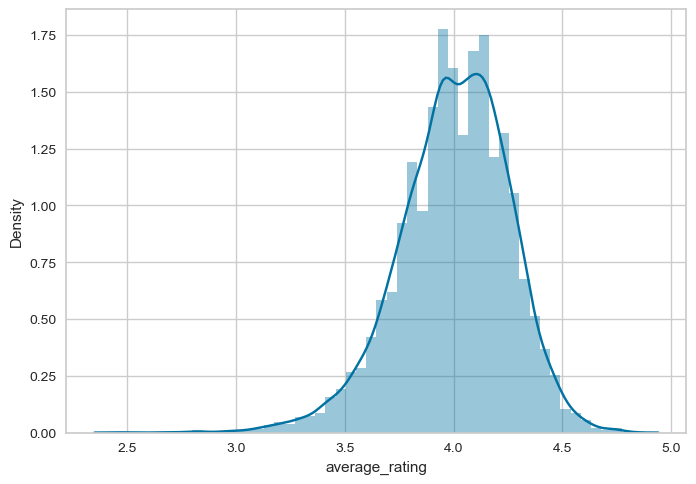

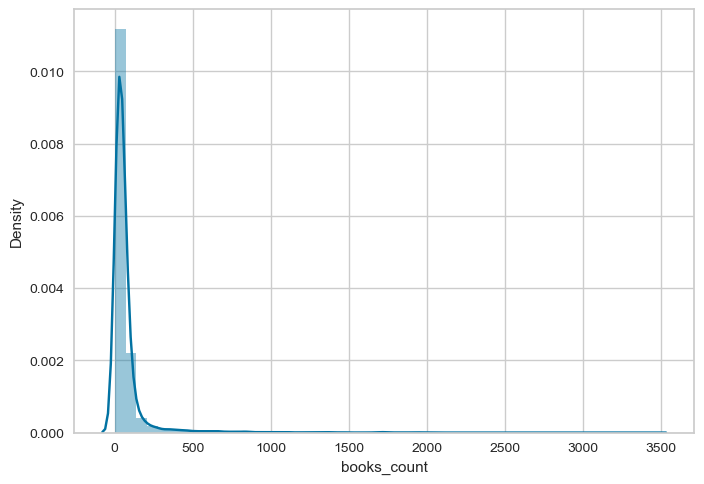

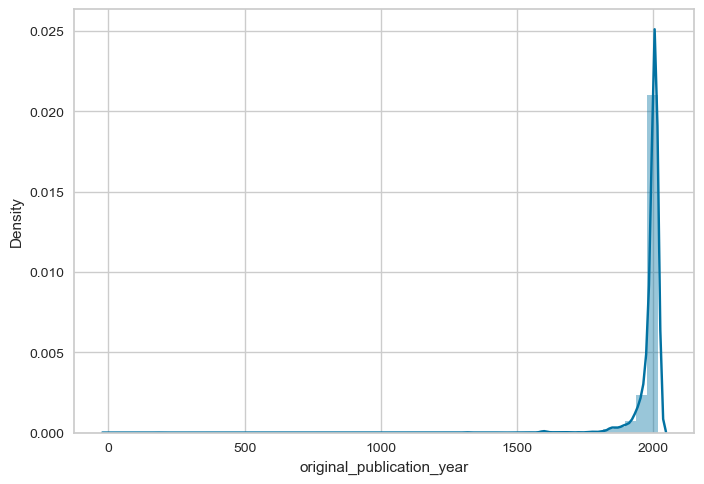

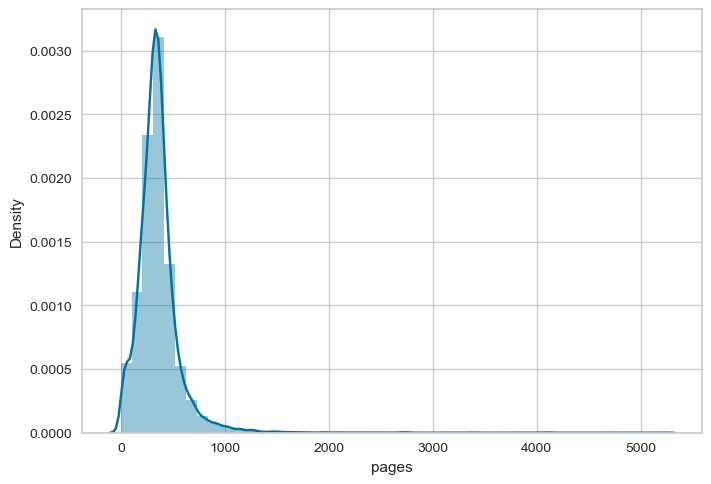

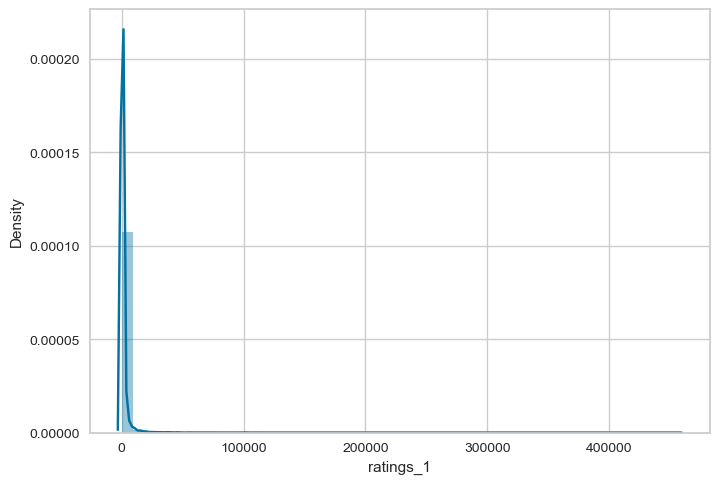

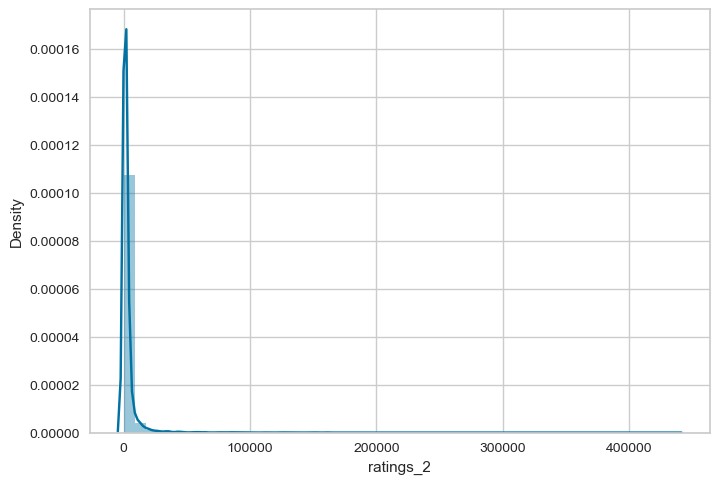

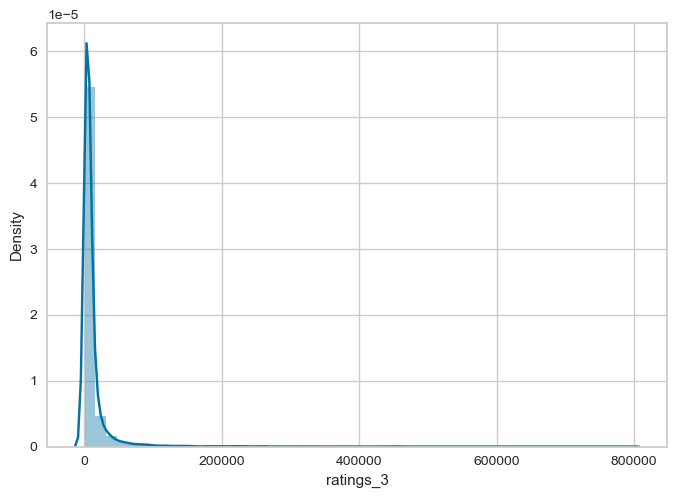

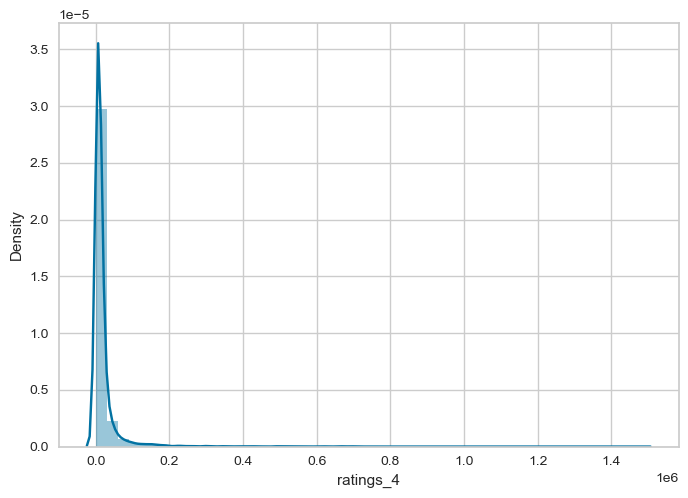

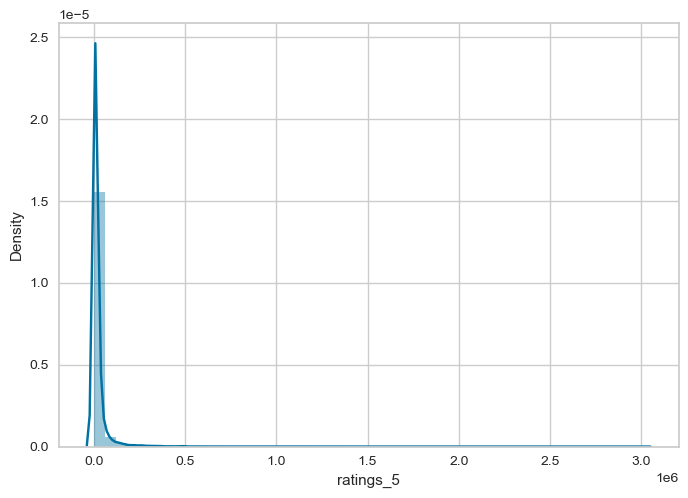

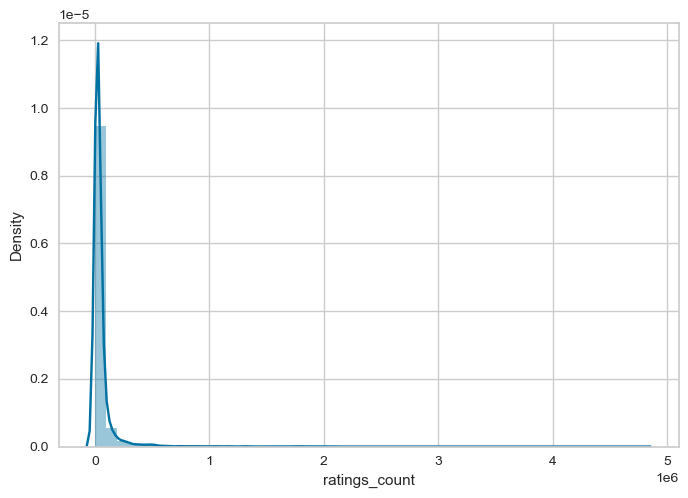

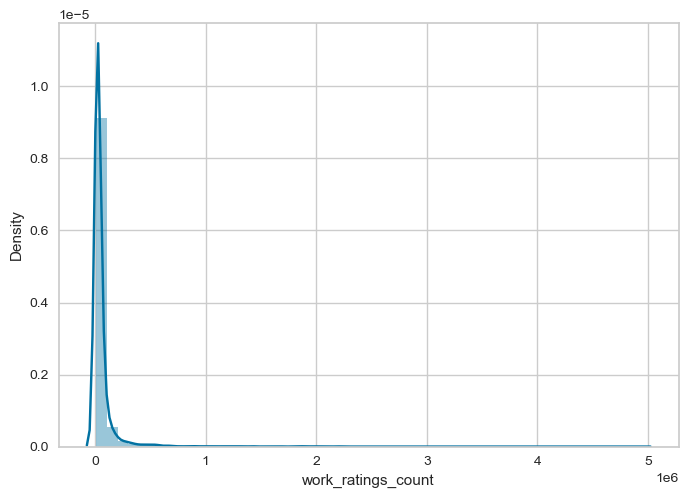

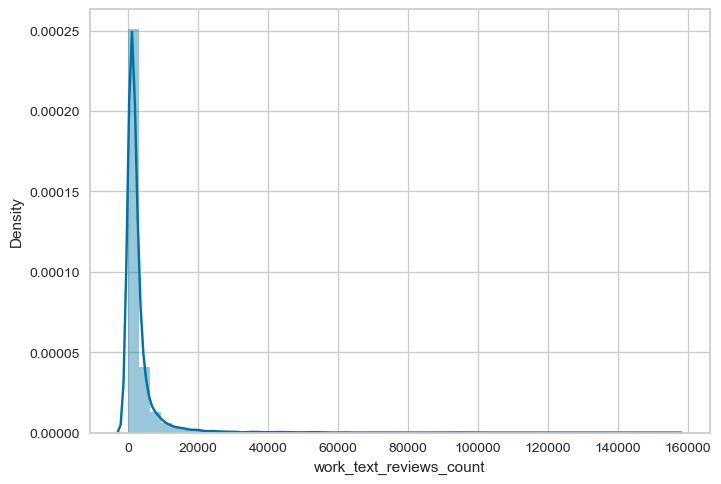

In [54]:
for column in numerical.columns:
    sns.distplot(numerical[column])

    plt.show()

#### <font color='blue'> **Average_rating**</font>

<font color='blue'>the average_rating variable is approximately normally distributed, but slightly left-skewed. Most of the books have an average rating between 3.5 and 4.5. There are also a few books with extremely low ratings (close to 0), but these are relatively rare.</font>

<font color='blue'>The peak of the distribution is a little bit above 4, indicating that most books have a pretty high average rating on Goodreads.</font>

<font color='blue'>the average_rating variable could be a useful feature if to predict something like book popularity or sales.</font>


#### <font color='green'> **book_count**</font>

<font color='green'>The books_count distribution is right-skewed, indicating that most books have a low count, but there are a few books with exceptionally high counts. This could represent books that have many editions or translations. For these few books, the books_count is much higher than for the rest, creating a long tail on the right side of the distribution..</font>

#### <font color='blue'>**original_publication_year distribution** </font>
    
<font color='blue'>It shows that the majority of the books in the dataset were published in more recent years. There is a sharp increase in the number of books published each year from around 2000.There are fewer books from earlier years in the dataset. This could be due to many reasons, including the fact that older books might be out of print, not included in the database, or because fewer books were published in the past.</font>



#### <font color='green'> **pages**</font>

<font color='green'>The pages distribution seems to be right-skewed, meaning most books have a relatively low number of pages, but there are some books with a very high number of pages.</font>

#### <font color='blue'>**ratings_1** </font>


<font color='blue'>The ratings_1 distribution is also right-skewed. This column probably reflects the number of 1-star ratings that each book has received.</font>

#### <font color='green'> All four of these distributions (ratings_2, ratings_3, ratings_4, ratings_5) are right-skewed, similar to ratings_1.</font>
<font color='green'>Most books have received a relatively low number of each type of rating, but there are a few books that have received a large number of certain ratings.</font>


#### <font color='darkslategrey'>All these distributions are skewed, and there are a few books that have received a very large number of ratings. This might suggest that a small number of very popular books are influencing the distributions, and that the majority of books receive fewer ratings.</font>

#### <font color='blue'>ratings_count</font>

<font color='blue'>This distribution reflects the number of ratings each book has received. The distribution is skewed to the right, indicating that most books have received a relatively small number of ratings, while a few books have received a very large number of ratings. This suggests that there are a few extremely popular books that have been rated by many users.</font>

#### <font color='green'>work_ratings_count</font>

<font color='green'>This distribution represents the number of ratings across all editions of each book. The shape of this distribution is quite similar to that of ratings_count, again suggesting that most books have received a small number of ratings across all editions, while a few books have received a large number of ratings across all editions.</font>


### <font color='purple'>Checking for distributions and Outliers</font>

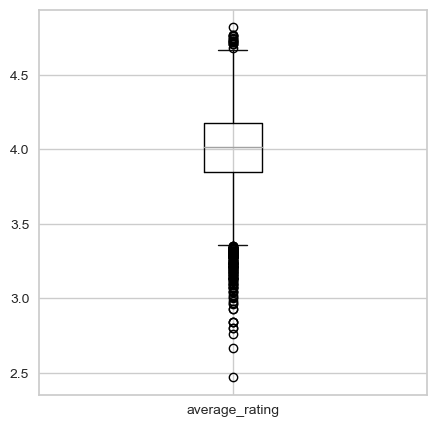

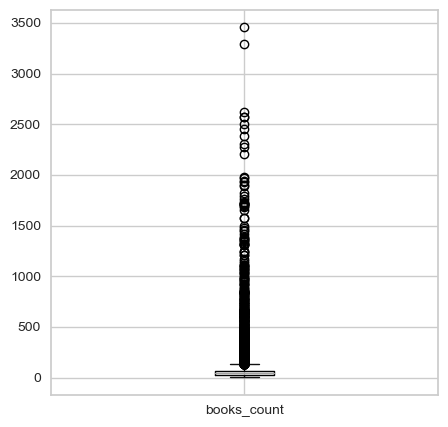

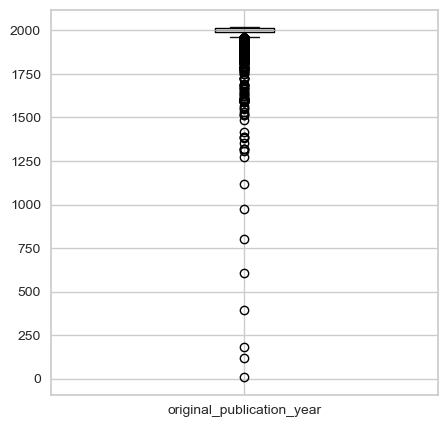

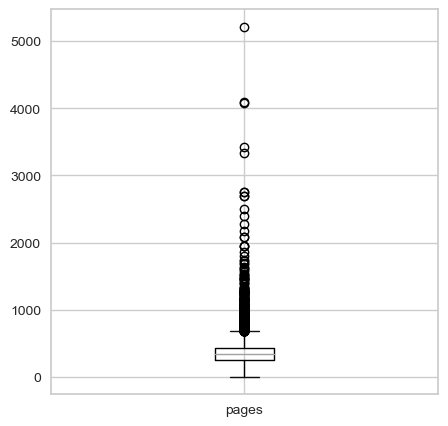

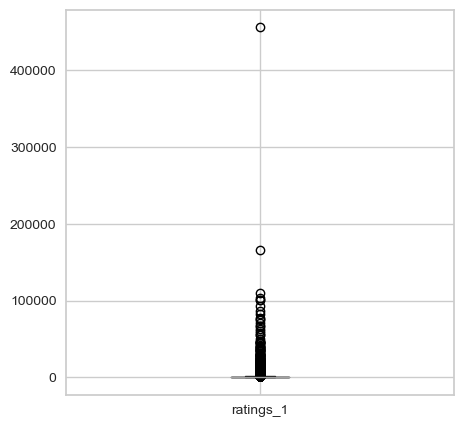

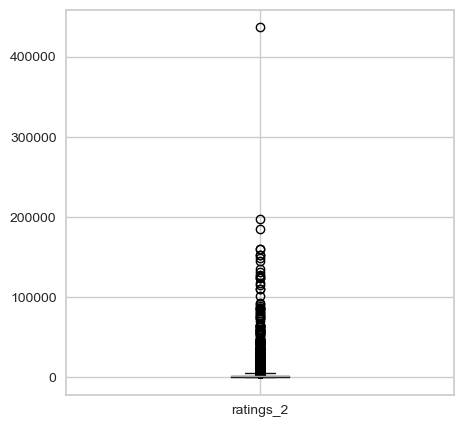

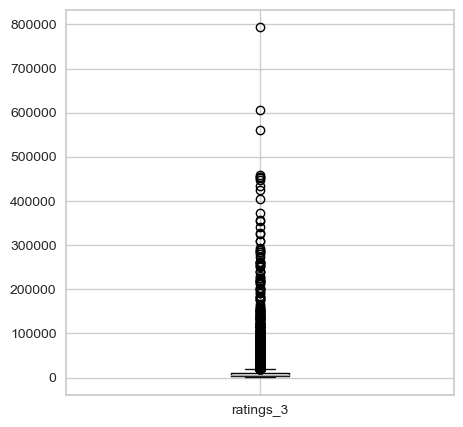

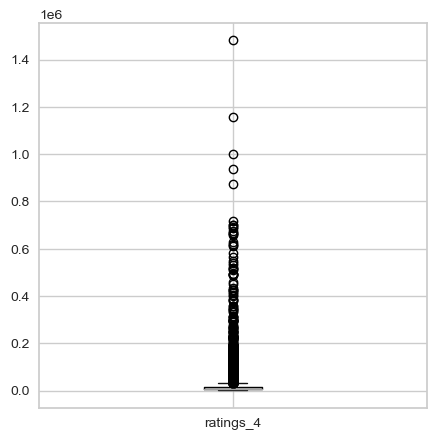

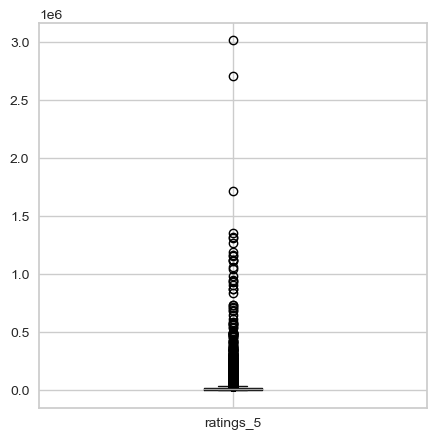

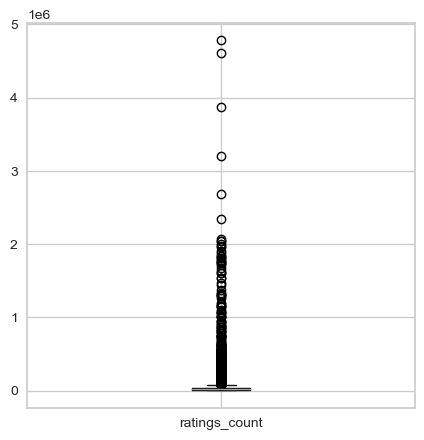

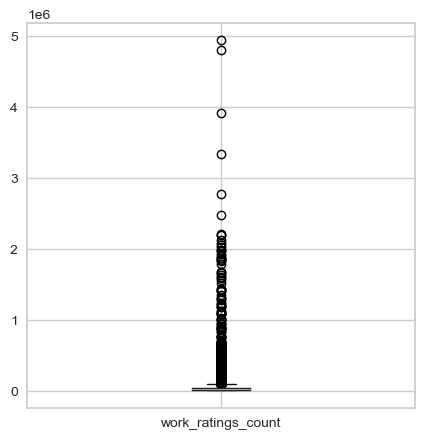

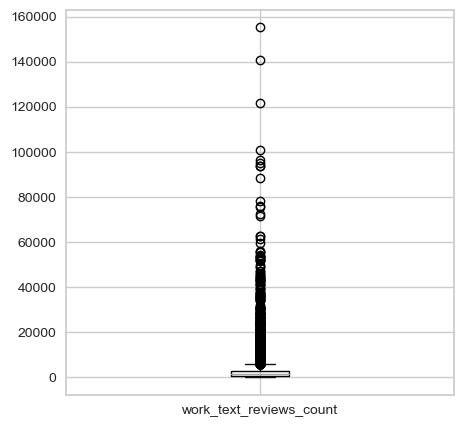

In [55]:
for column in numerical:
    plt.figure(figsize=(5,5))
    numerical.boxplot([column])
    plt.show()


<font color='burgnadi'> **average_rating:**</font>

<font color='burgnadi'>The boxplot shows the distribution of average ratings for the books. The median rating is around 4.0, and most of the ratings are between approximately 3.5 and 4.5 (the box), which is quite high. There are some books with ratings below 3.5 and above 4.5. There are also a few outliers with very low ratings.</font>

<font color='burgnadi'> **books_count:**</font>

<font color='burgnadi'>This boxplot shows the distribution of the number of books for each entry. The median number of books is around 50 and most of the entries have less than 100 books. There are many outliers in this data. These outliers indicate entries with a very high number of books.</font>

<font color='burgnadi'> **original_publication_year:**</font>

<font color='burgnadi'>This boxplot shows the distribution of the original publication year for the books. The median publication year is around 2000, and most of the books were published between approximately 1990 and 2010 (the box).</font>


#### <font color='black'>I willl not remove outliers because I think they represent valid data points, for example there are some books that are rated very low by readers and it might not be appropriate to remove them. These low-rated books could be providing valuable information about reader preferences.Or there are books with lower counts maybe because they are nt as popular.</font>


### <font color='purple'> Pairplots </font>

sns.pairplot(numerical)
plt.show()

### <font color='purple'> Correlation Matrix: Looking for multicollinearity</font>

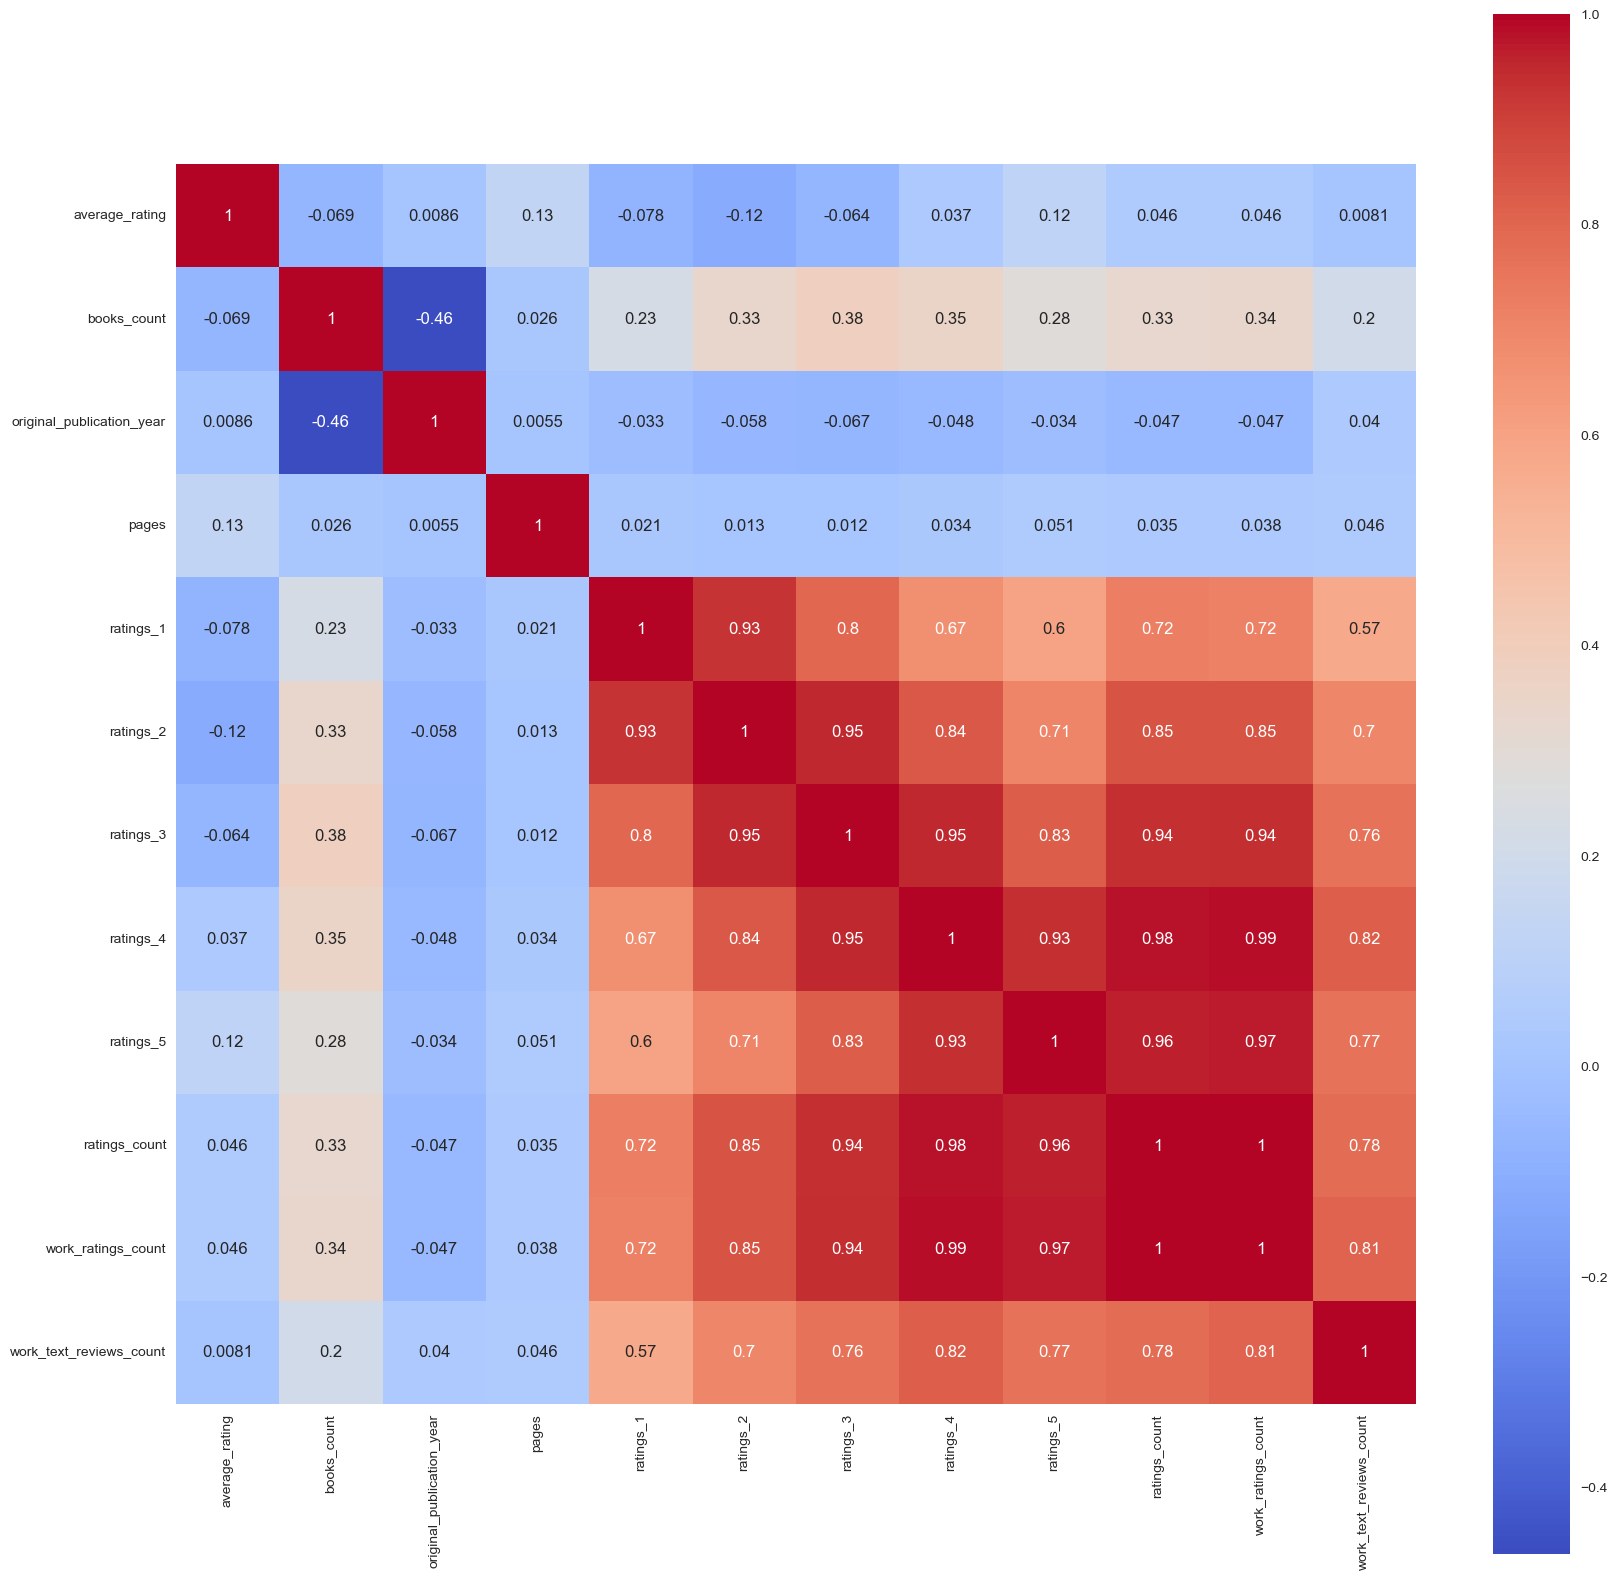

In [56]:
correlation_matrix = numerical.corr()


plt.figure(figsize=(20, 20)) 
sns.heatmap(correlation_matrix, annot=True, square=True, cmap='coolwarm')
plt.show()

<font color='blue'> **'ratings_count' and 'work_ratings_count'** are highly correlated as they represent the same concept: number of people who rated the book. I willdrop the 'work_ratings_count'</font>

<font color='blue'>Similarly, **all the 'ratings_X' variables** also are highly correlated with each other and with 'ratings_count' and 'work_ratings_count'.</font>
    
<font color='blue'>'average_rating' has some degree of positive correlation with 'ratings_4' and 'ratings_5', and negative correlation with 'ratings_1', 'ratings_2', and 'ratings_3'. This suggests that books with higher average ratings tend to have more 4-star and 5-star ratings and fewer 1-star, 2-star, and 3-star ratings.
Other variables do not show strong correlations with each other.</font>


### <font color='purple'> Checking the correlation_matrix for the df with encoded values as well</font>

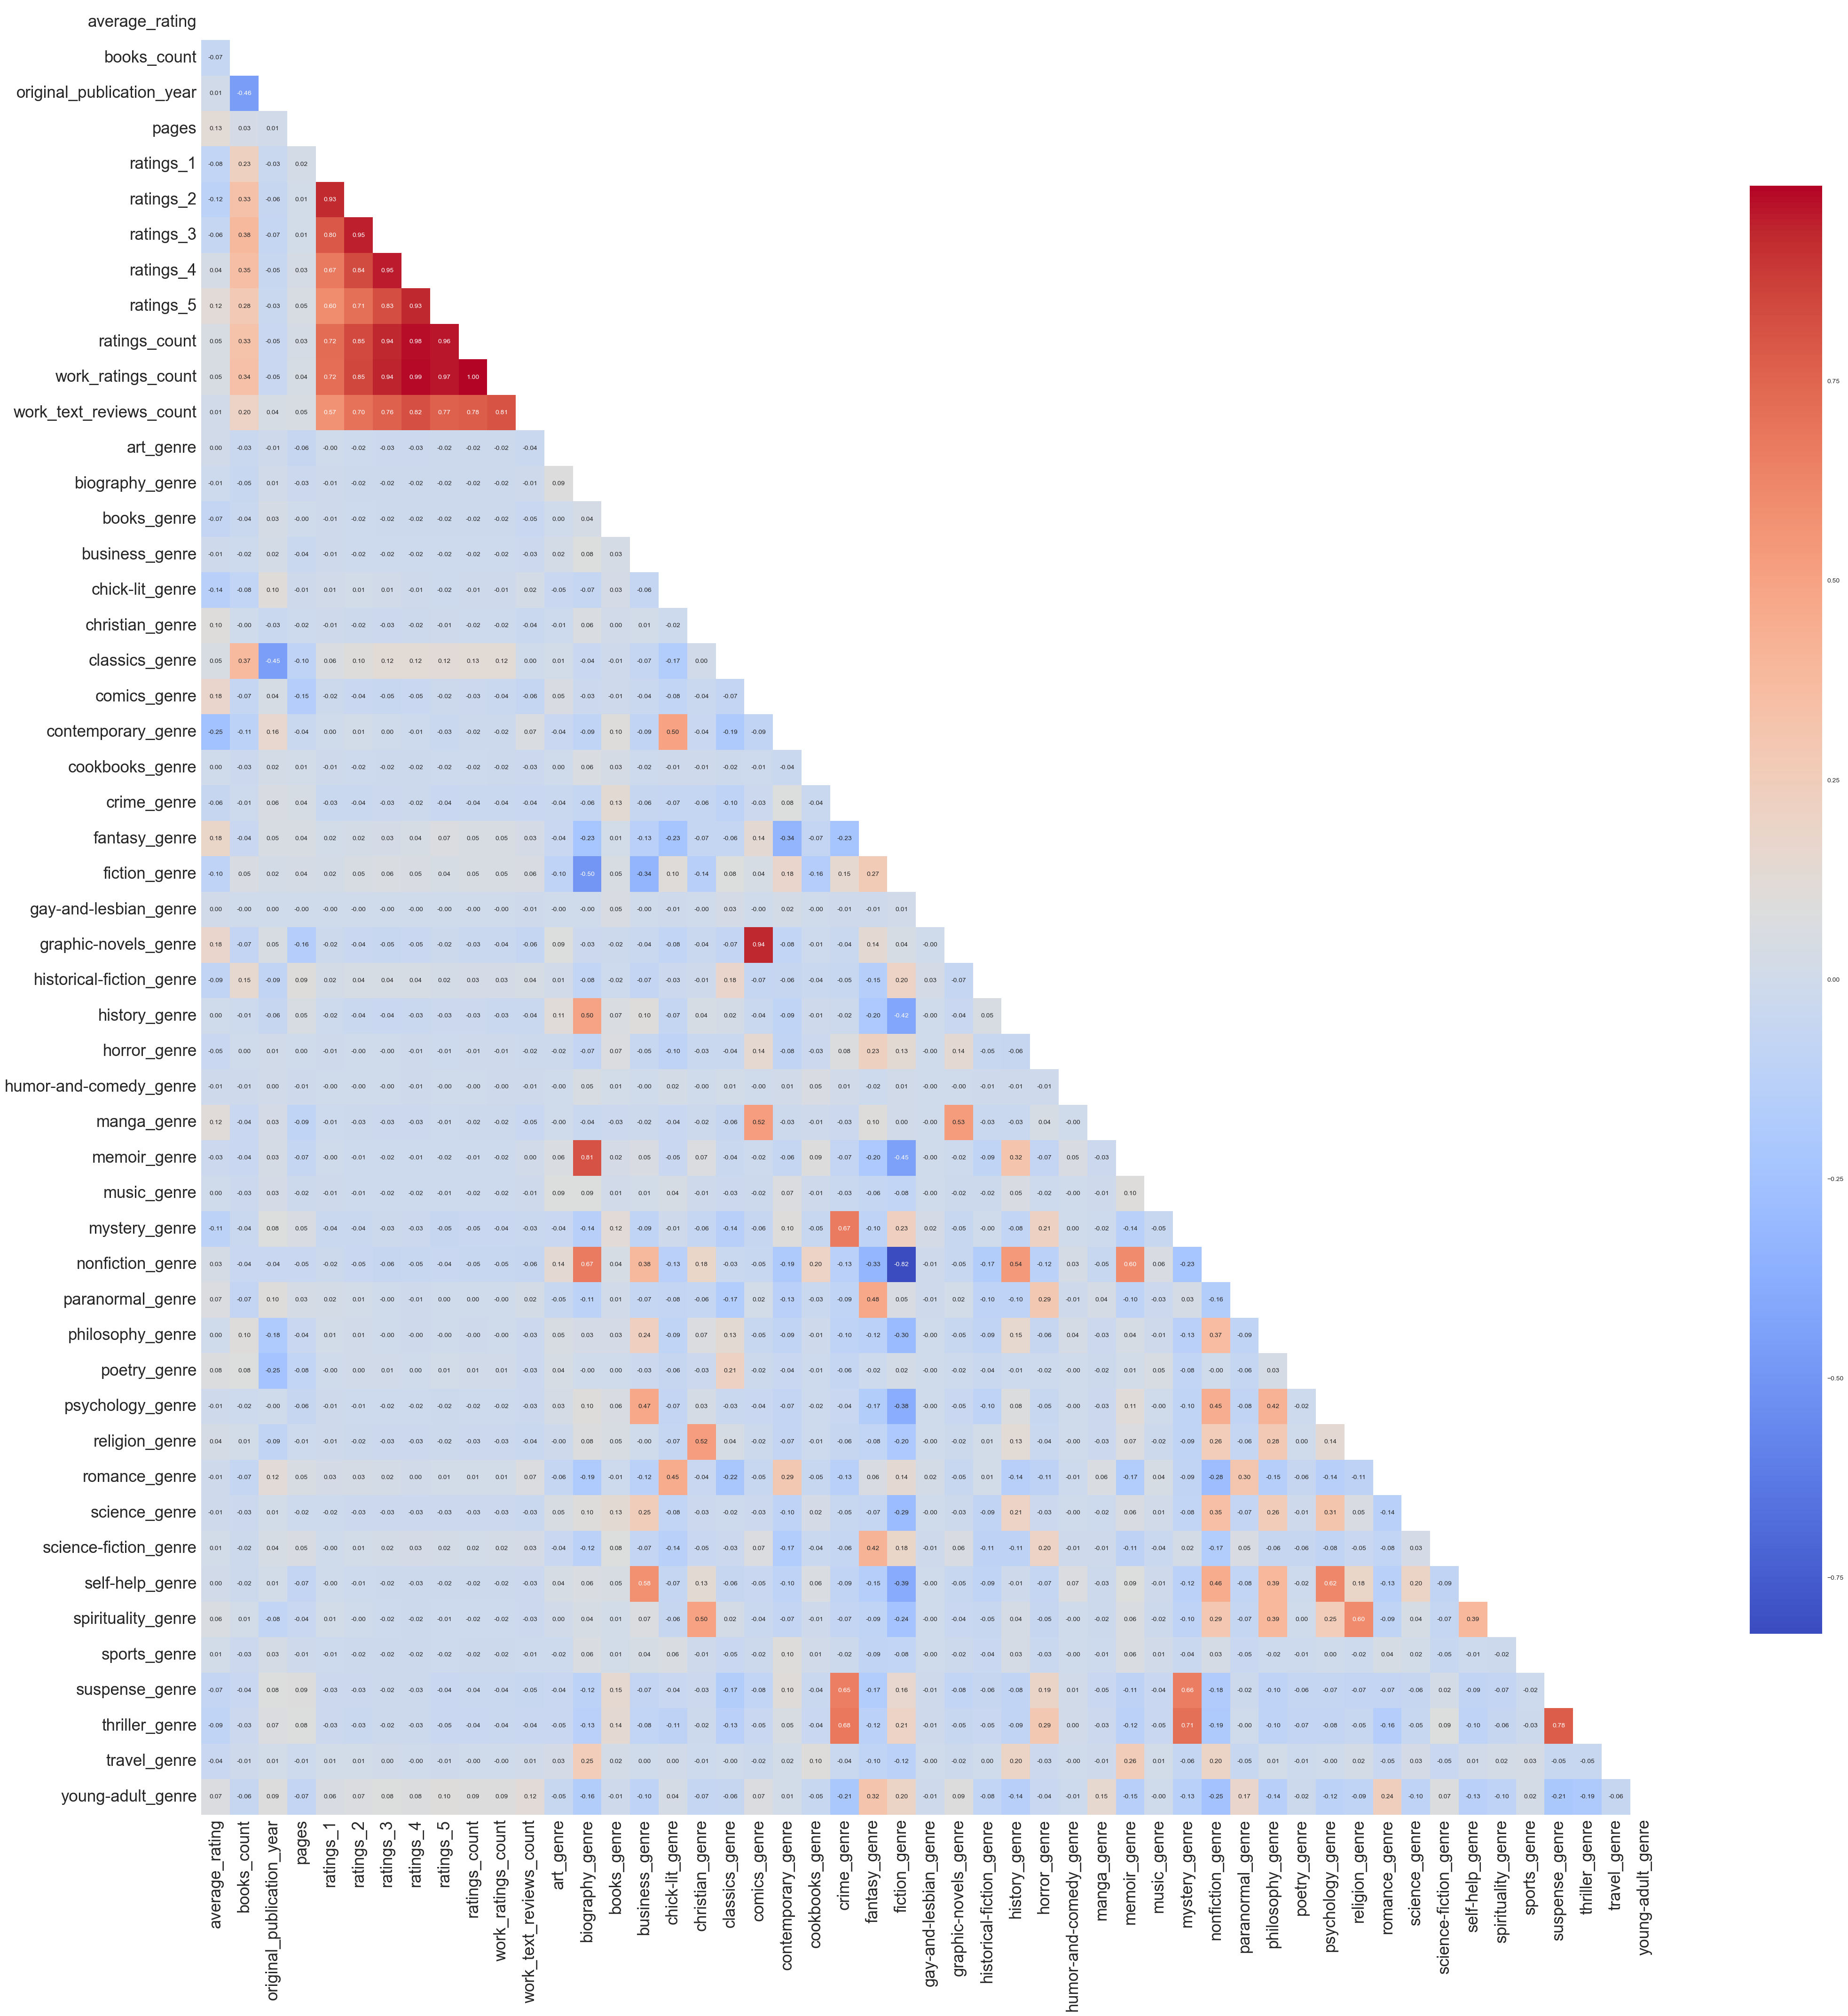

In [57]:
correlation_matrix = books_enriched_cleaned_final.corr()


plt.figure(figsize=(50, 50)) 
mask = np.triu(np.ones_like(books_enriched_cleaned_final.corr(), dtype=bool)) # Create a mask for the upper triangle

sns.heatmap(books_enriched_cleaned_final.corr(), mask=mask, cmap='coolwarm', annot=True, fmt=".2f", 
            cbar_kws={"shrink": .8}, annot_kws={"size": 10})

plt.xticks(fontsize=25) # Increase xtick label size
plt.yticks(fontsize=25) # Increase ytick label size
plt.show()

<font color='blue'>The genre-encoded features mostly have low correlation with other features. This is  expected because certain genre should not have a storing relation with the number of ratings or the publication year.</font>



### <font color='purple'> I will drop "work_ratings_count", "ratings_3", "ratings_4", "ratings_5"</font>

In [58]:
books_enriched_cleaned_final=books_enriched_cleaned_final.drop(['work_ratings_count', 'ratings_3', 'ratings_4', 'ratings_5'], axis=1)
books_enriched_cleaned_final

average_rating  books_count  original_publication_year  pages  \
0               4.34          272                       2008    374   
1               4.44          491                       1997    309   
2               3.57          226                       2005    501   
3               4.25          487                       1960    324   
4               3.89         1356                       1925    200   
...              ...          ...                        ...    ...   
9943            3.98           58                       2005    816   
9944            4.18            1                       2016    436   
9945            3.69           24                       2000    368   
9946            4.12           29                       2010    362   
9947            4.00           31                       1998    475   

      ratings_1  ratings_2  ratings_count  work_text_reviews_count  art_genre  \
0         66715     127936        4780653                   155254          0   
1         75504     101676        4602479                    75867          0   
2        456191     436802        3866839                    95009          0   
3         60427     117415        3198671                    72586          0   
4         86236     197621        2683664                    51992          0   
...         ...        ...            ...                      ...        ...   
9943         72        390          10188                      495          0   
9944        179        521          11570                     1891          0   
9945        268        684           7693                       26          0   
9946        113        331          10129                      411          0   
9947        117        345           9162                      364          0   

      biography_genre  ...  romance_genre  science_genre  \
0                   0  ...              1              0   
1                   0  ...              0              0   
2                   0  ...              1              0   
3                   0  ...              0              0   
4                   0  ...              1              0   
...               ...  ...            ...            ...   
9943                0  ...              0              0   
9944                0  ...              1              0   
9945                0  ...              0              0   
9946                0  ...              1              0   
9947                0  ...              0              0   

      science-fiction_genre  self-help_genre  spirituality_genre  \
0                         1                0                   0   
1                         0                0                   0   
2                         0                0                   0   
3                         0                0                   0   
4                         0                0                   0   
...                     ...              ...                 ...   
9943                      0                0                   0   
9944                      0                0                   0   
9945                      1                0                   0   
9946                      0                0                   0   
9947                      0                0                   0   

      sports_genre  suspense_genre  thriller_genre  travel_genre  \
0                0               0               0             0   
1                0               0               0             0   
2                0               0               0             0   
3                0               0               0             0   
4                0               0               0             0   
...            ...             ...             ...           ...   
9943             0               1               1             0   
9944             0               1               0             0   
9945             0            

In [59]:
books_enriched_cleaned_final.shape

(9948, 47)

## <font color='purple'> Transformation </font>

### <font color='purple'> Standardization </font>

In [60]:
scaler = StandardScaler()

standardized_data = scaler.fit_transform(books_enriched_cleaned_final)

# The result is a numpy array, so let's convert it back to a dataframe
standardized_df = pd.DataFrame(standardized_data, columns=books_enriched_cleaned_final.columns)

standardized_df.head()

average_rating  books_count  original_publication_year     pages  \
0        1.328429     1.184118                   0.288563  0.066161   
1        1.721513     2.496581                   0.115214 -0.234976   
2       -1.698319     0.908441                   0.241286  0.654537   
3        0.974654     2.472609                  -0.467867 -0.165483   
4       -0.440449     7.680510                  -1.019431 -0.739960   

   ratings_1  ratings_2  ratings_count  work_text_reviews_count  art_genre  \
0   9.836610  12.845493      29.991744                24.818242  -0.149683   
1  11.159131  10.143214      28.861186                11.883696  -0.149683   
2  68.442830  44.629275      24.193368                15.002507  -0.149683   
3   8.890427  11.762832      19.953677                11.349121  -0.149683   
4  12.774024  20.016412      16.685831                 7.993735  -0.149683   

   biography_genre  ...  romance_genre  science_genre  science-fiction_genre  \
0        -0.299921  ...       1.419025      -0.217919               2.445619   
1        -0.299921  ...      -0.704709      -0.217919              -0.408894   
2        -0.299921  ...       1.419025      -0.217919              -0.408894   
3        -0.299921  ...      -0.704709      -0.217919              -0.408894   
4        -0.299921  ...       1.419025      -0.217919              -0.408894   

   self-help_genre  spirituality_genre  sports_genre  suspense_genre  \
0        -0.213066           -0.182309      -0.11685        -0.41157   
1        -0.213066           -0.182309      -0.11685        -0.41157   
2        -0.213066           -0.182309      -0.11685        -0.41157   
3        -0.213066           -0.182309      -0.11685        -0.41157   
4        -0.213066           -0.182309      -0.11685        -0.41157   

   thriller_genre  travel_genre  young-adult_genre  
0       -0.472881      -0.14433           1.618668  
1       -0.472881      -0.14433           1.618668  
2       -0.472881      -0.14433           1.618668  
3       -0.472881      -0.14433           1.618668  
4       -0.472881      -0.14433          -0.617792  

[5 rows x 47 columns]

### <font color='purple'> Min-Max Scaling:</font>

In [61]:
scaler = MinMaxScaler()

normalized_data = scaler.fit_transform(books_enriched_cleaned_final)

# Convert the NumPy array back into a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=books_enriched_cleaned_final.columns)
normalized_df.head()

average_rating  books_count  original_publication_year     pages  \
0        0.795745     0.078460                   0.995520  0.071702   
1        0.838298     0.141865                   0.990045  0.059241   
2        0.468085     0.065142                   0.994027  0.096051   
3        0.757447     0.140706                   0.971628  0.062117   
4        0.604255     0.392299                   0.954206  0.038344   

   ratings_1  ratings_2  ratings_count  work_text_reviews_count  art_genre  \
0   0.146223   0.292844       1.000000                 1.000000        0.0   
1   0.165489   0.232721       0.962709                 0.488654        0.0   
2   1.000000   1.000000       0.808743                 0.611951        0.0   
3   0.132439   0.268756       0.668899                 0.467520        0.0   
4   0.189015   0.452389       0.561110                 0.334871        0.0   

   biography_genre  ...  romance_genre  science_genre  science-fiction_genre  \
0              0.0  ...            1.0            0.0                    1.0   
1              0.0  ...            0.0            0.0                    0.0   
2              0.0  ...            1.0            0.0                    0.0   
3              0.0  ...            0.0            0.0                    0.0   
4              0.0  ...            1.0            0.0                    0.0   

   self-help_genre  spirituality_genre  sports_genre  suspense_genre  \
0              0.0                 0.0           0.0             0.0   
1              0.0                 0.0           0.0             0.0   
2              0.0                 0.0           0.0             0.0   
3              0.0                 0.0           0.0             0.0   
4              0.0                 0.0           0.0             0.0   

   thriller_genre  travel_genre  young-adult_genre  
0             0.0           0.0                1.0  
1             0.0           0.0                1.0  
2             0.0           0.0                1.0  
3             0.0           0.0                1.0  
4             0.0           0.0                0.0  

[5 rows x 47 columns]

## <font color='purple'> Clusetering with K-Means</font>

### <font color='purple'> Visualizing the results of clustering without tuning the K</font>

## <font color='violet'> Using the standardized_df </font>

In [62]:
pca = PCA(2) #reducing the cols to 2
X_2D_standardized = pca.fit_transform(standardized_df)
X_2D_standardized


array([[-4.1636136 , 30.29397042],
       [-2.80646998, 25.25001357],
       [-6.27646643, 58.42895764],
       ...,
       [-1.6324172 , -2.61388989],
       [-2.46018517, -3.19761345],
       [ 2.55904978, -0.4033006 ]])

In [63]:
kmeans_standard = KMeans(n_clusters=8, random_state=0)#let's take 8 for K as a test
kmeans_standard.fit(X_2D_standardized)


KMeans(random_state=0)

In [64]:
clusters_standardized = kmeans_standard.predict(X_2D_standardized)
clusters_standardized

array([3, 3, 7, ..., 0, 0, 4], dtype=int32)

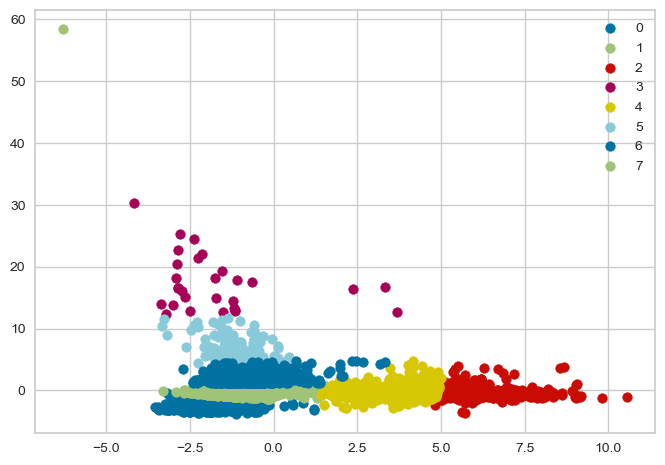

In [65]:
labels = np.unique(clusters_standardized)

for i in labels:
    plt.scatter(X_2D_standardized[clusters_standardized == i , 0] , X_2D_standardized[clusters_standardized == i , 1] , label = i)
plt.legend()
plt.show()

### <font color='purple'> Choosing the best K: Using standardised data (scaled by standard scaler) </font>

### <font color='purple'>Elbow Method:</font>

Calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.

Inertia measures the sum of squared distances of samples to their nearest cluster center. In other words, it measures the internal coherence of clusters.



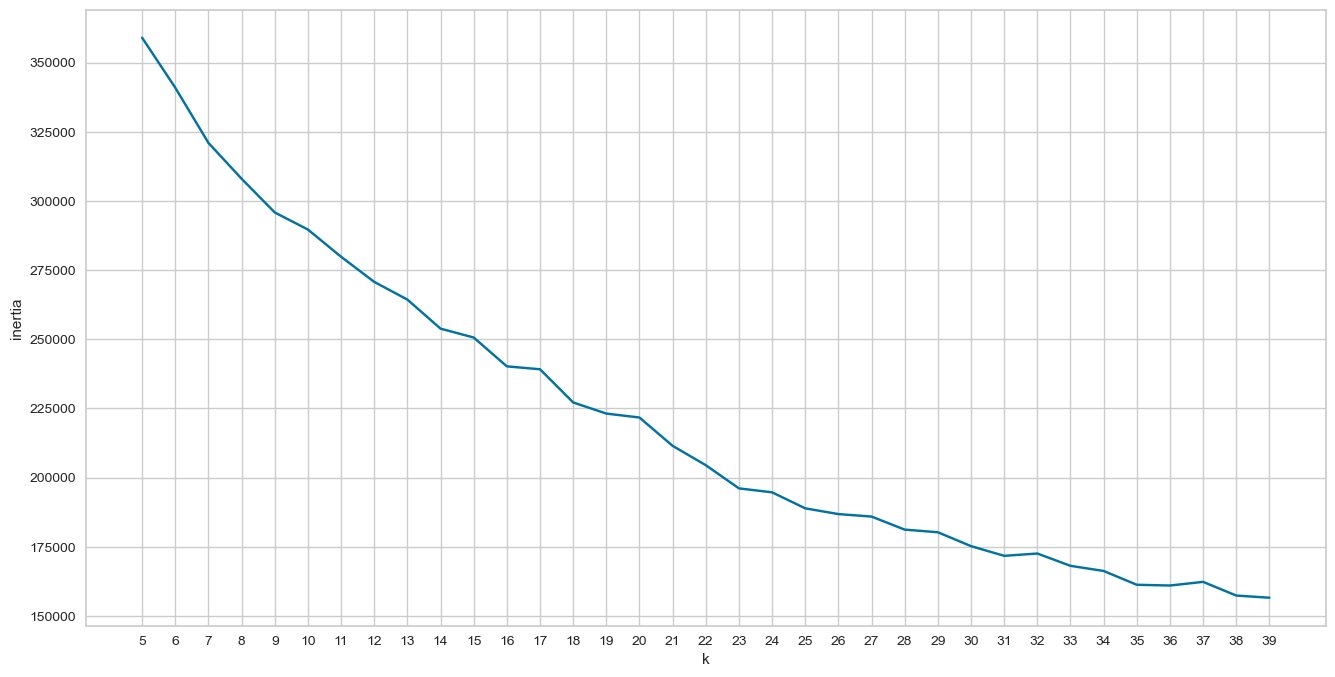

In [66]:
K = range(5, 40)

inertia = []

for k in K:
    kmeans_standard = KMeans(n_clusters=k, random_state=42)
    kmeans_standard.fit(standardized_df)
    inertia.append(kmeans_standard.inertia_)

inertia

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()




Typically, we look for the point where the decrease in inertia starts to slow down significantly, which is the "elbow" of the curve. In this plot, there isn't a clear and abrupt "elbow" point.

### <font color='purple'>Silhouette Analysis:</font>

This method measures how close each sample in one cluster is to the samples in the neighboring clusters. Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster. The optimal number of clusters is the one that maximizes the average silhouette over a range of possible clusters.

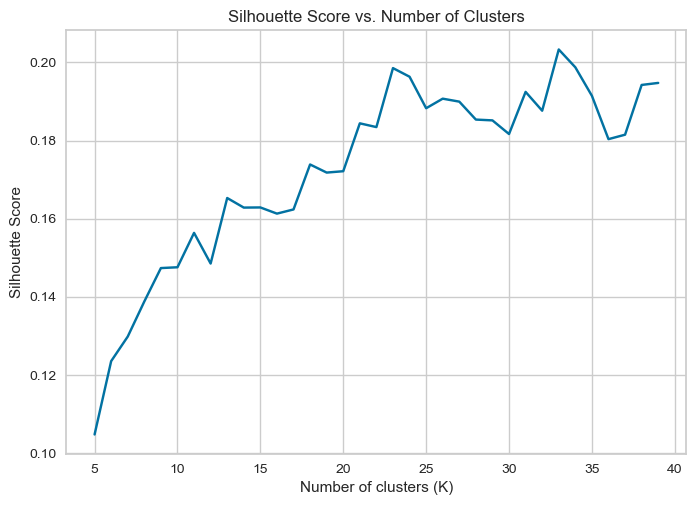

In [67]:
K = range(5, 40)

silhouette_scores = []

for k in K:
    kmeans_standard = KMeans(n_clusters=k, random_state=42)
    kmeans_standard.fit(standardized_df)
    labels_standard = kmeans_standard.labels_
    score_standard = silhouette_score(standardized_df, labels_standard)
    silhouette_scores.append(score_standard)

# Plotting the silhouette scores
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [68]:
K = range(5, 40)
silhouette_scores = []

for k in K:
    kmeans_standard = KMeans(n_clusters=k, random_state=42)
    kmeans_standard.fit(standardized_df)
    labels_standard = kmeans_standard.labels_
    score_standard = silhouette_score(standardized_df, labels_standard)
    silhouette_scores.append(score_standard)

for k, score_standard in zip(K, silhouette_scores):
    print(f"Silhouette Score for {k} clusters: {score_standard}")

Silhouette Score for 5 clusters: 0.10474670760837532
Silhouette Score for 6 clusters: 0.12352272970072715
Silhouette Score for 7 clusters: 0.12981425769460897
Silhouette Score for 8 clusters: 0.13879879617389737
Silhouette Score for 9 clusters: 0.1473545403977429
Silhouette Score for 10 clusters: 0.147562866485806
Silhouette Score for 11 clusters: 0.1563668791587262
Silhouette Score for 12 clusters: 0.14851529374673322
Silhouette Score for 13 clusters: 0.165295026115428
Silhouette Score for 14 clusters: 0.16284064519189084
Silhouette Score for 15 clusters: 0.1628793981117604
Silhouette Score for 16 clusters: 0.16129737503251818
Silhouette Score for 17 clusters: 0.16236711488611283
Silhouette Score for 18 clusters: 0.17388051388811152
Silhouette Score for 19 clusters: 0.1718066623031876
Silhouette Score for 20 clusters: 0.17215576008712272
Silhouette Score for 21 clusters: 0.18441572502541884
Silhouette Score for 22 clusters: 0.1834535661500668
Silhouette Score for 23 clusters: 0.198559

#### <font color='green'>Silhouette scores shows 33 is the best K</font>

### <font color='purple'>Visualizer</font>


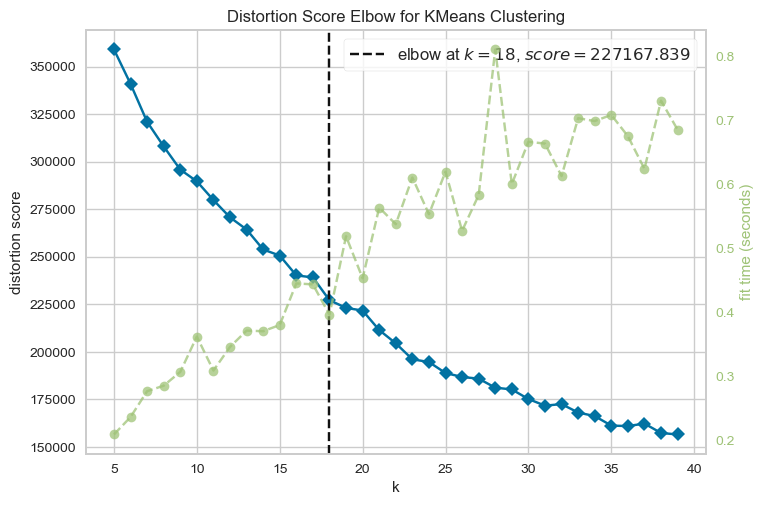

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [69]:
visualizer_standard = KElbowVisualizer(kmeans_standard, k=(5,40))

visualizer_standard.fit(standardized_df) 
visualizer_standard.poof()   

#### <font color='green'>KElbowVisualizer shows 18 as the best K</font>

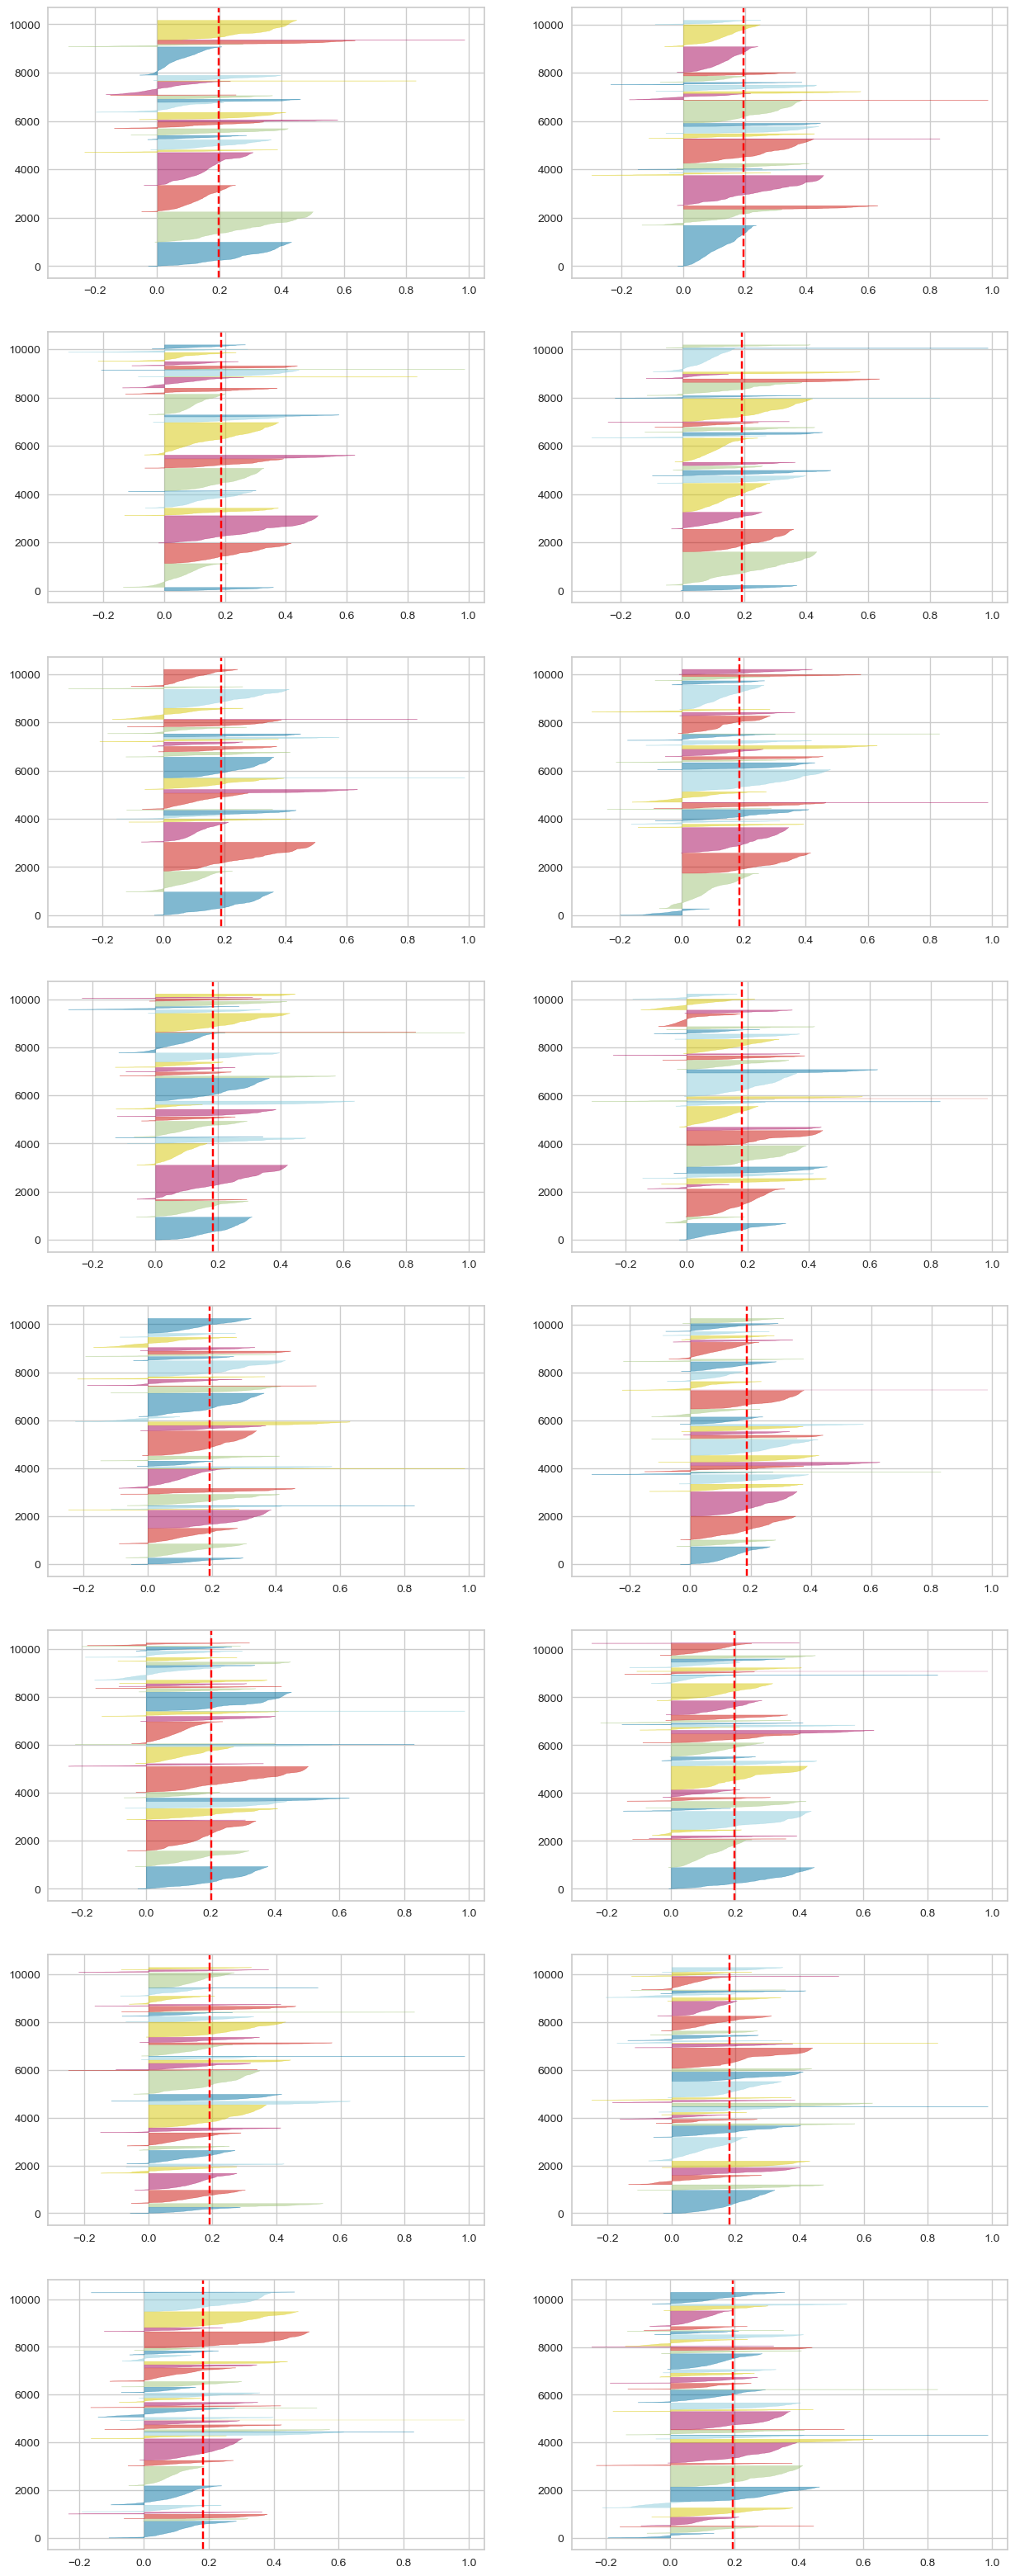

In [70]:
fig, ax = plt.subplots(8, 2, figsize=(15, 40)) 

for idx, i in enumerate(range(23, 39)):  
    km_standard = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(idx, 2)
    visualizer_standard = SilhouetteVisualizer(km_standard, colors='yellowbrick', ax=ax[q][mod])
    visualizer_standard.fit(standardized_df)

#### <font color='green'> I can't really understand anything from this visuals since I need a significant number of clusters.</font>

In [71]:
kmeans_standard = KMeans(n_clusters=18, random_state=42)
clusters_standard = kmeans_standard.fit_predict(standardized_df)
clusters_standard

array([ 3,  3,  3, ...,  4,  4, 11], dtype=int32)

In [72]:
sscore_standard= metrics.silhouette_score(standardized_df, clusters_standard)
sscore_standard

0.17388051388811152

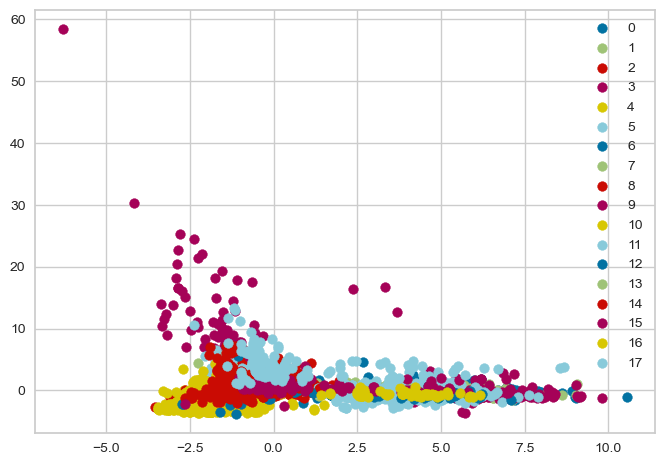

In [73]:
labels = np.unique(clusters_standard)

for i in labels:
    plt.scatter(X_2D_standardized[clusters_standard == i , 0] , X_2D_standardized[clusters_standard == i , 1] , label = i)
plt.legend()
plt.show()




## <font color='violet'> Using the normalized_df </font>

In [74]:
pca = PCA(2) #reducing the cols to 2
X_2D_normalized = pca.fit_transform(normalized_df)
X_2D_normalized


array([[-0.15934648, -1.19911957],
       [ 0.17554321, -0.78262491],
       [-0.16802051, -1.26069008],
       ...,
       [-0.94982991,  0.85259078],
       [-1.5489251 ,  0.8480464 ],
       [ 1.1222052 ,  0.62515957]])

In [75]:
kmeans_normalized = KMeans(n_clusters=7, random_state=0) #let's take 7 for K as a test
kmeans_normalized.fit(X_2D_normalized)

KMeans(n_clusters=7, random_state=0)

In [76]:
clusters_normalized = kmeans_normalized.predict(X_2D_normalized)
clusters_normalized

array([2, 5, 2, ..., 1, 1, 3], dtype=int32)

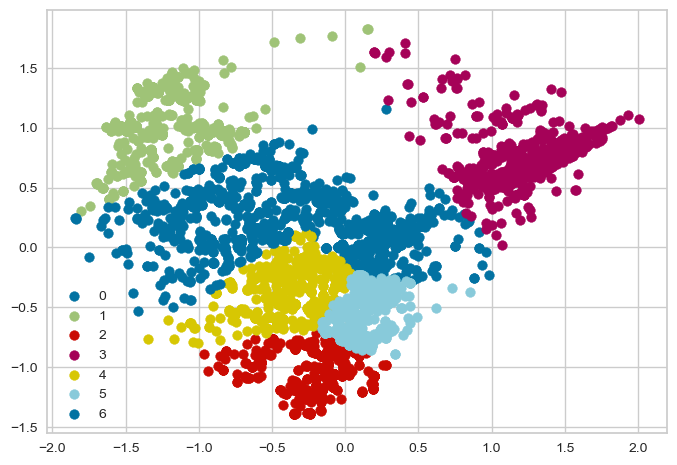

In [77]:
labels = np.unique(clusters_normalized)

for i in labels:
    plt.scatter(X_2D_normalized[clusters_normalized == i , 0] , X_2D_normalized[clusters_normalized == i , 1] , label = i)
plt.legend()
plt.show()


### <font color='purple'> Choosing the best K: Using normalized data (scaled with MinMaxscaler)</font>

### <font color='purple'>Elbow Method:</font>


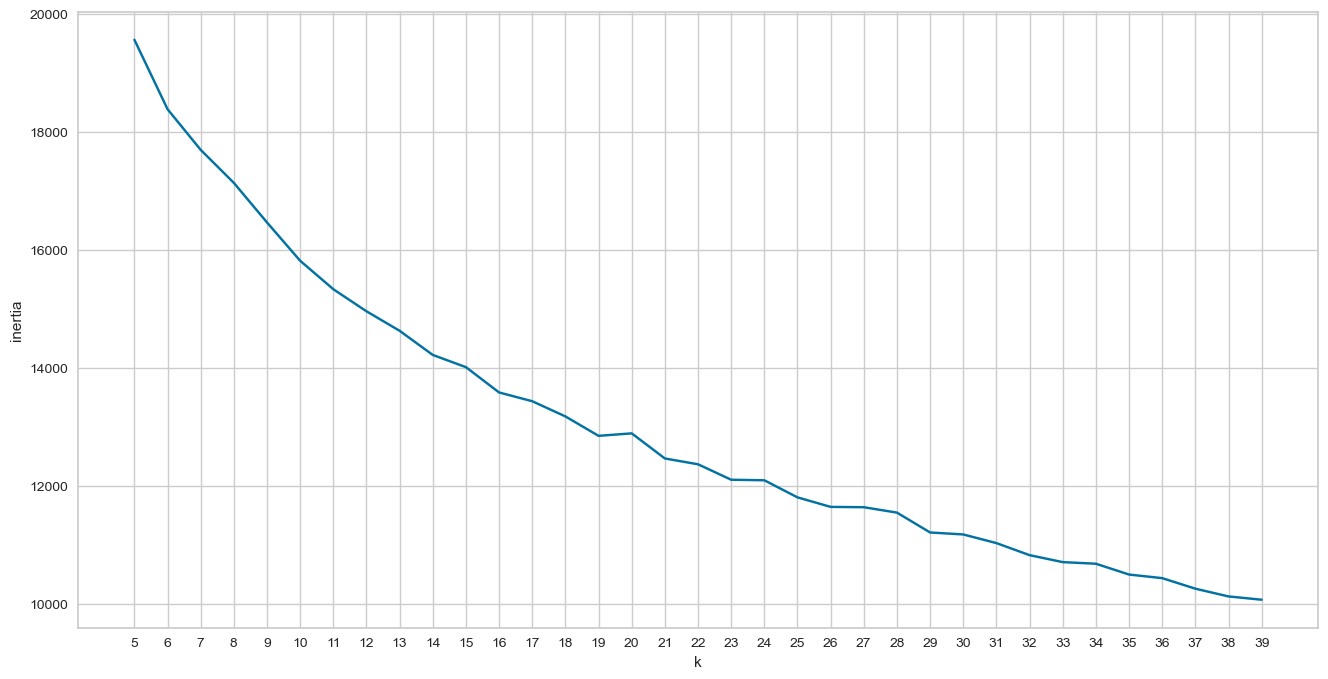

In [78]:
K = range(5, 40)

inertia = []

for k in K:
    kmeans_normalized = KMeans(n_clusters=k, random_state=42)
    kmeans_normalized.fit(normalized_df)
    inertia.append(kmeans_normalized.inertia_)

inertia

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.show()




### <font color='purple'>Silhouette Analysis:</font>


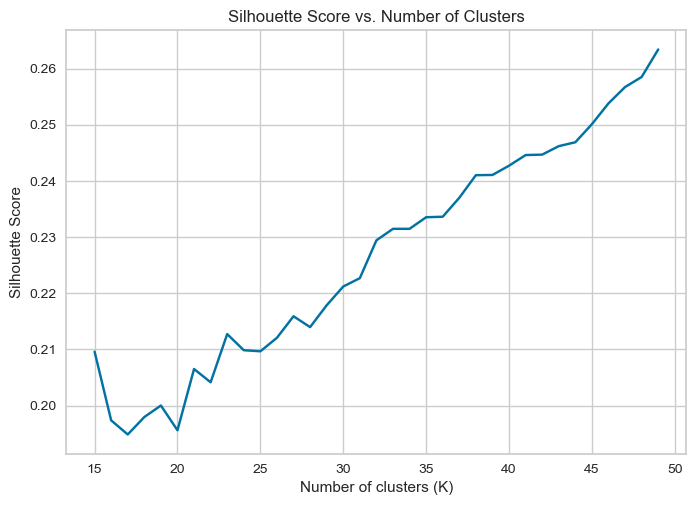

In [79]:
K = range(15, 50)

silhouette_scores = []

for k in K:
    kmeans_normalized = KMeans(n_clusters=k, random_state=42)
    kmeans_normalized.fit(normalized_df)
    labels_normalized = kmeans_normalized.labels_
    score_normalized = silhouette_score(normalized_df, labels_normalized)
    silhouette_scores.append(score_normalized)

# Plotting the silhouette scores
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [80]:
K = range(10, 50)
silhouette_scores = []

for k in K:
    kmeans_normalized = KMeans(n_clusters=k, random_state=42)
    kmeans_normalized.fit(normalized_df)
    labels_normalized = kmeans_normalized.labels_
    score_normalized = silhouette_score(normalized_df, labels_normalized)
    silhouette_scores.append(score_normalized)

for k, score_normalized in zip(K, silhouette_scores):
    print(f"Silhouette Score for {k} clusters: {score_normalized}")

Silhouette Score for 10 clusters: 0.21224673230346203
Silhouette Score for 11 clusters: 0.20442816209032338
Silhouette Score for 12 clusters: 0.21127103167082073
Silhouette Score for 13 clusters: 0.2021730550950738
Silhouette Score for 14 clusters: 0.20865614091986925
Silhouette Score for 15 clusters: 0.2095975072886024
Silhouette Score for 16 clusters: 0.19735478110084606
Silhouette Score for 17 clusters: 0.19483906582133612
Silhouette Score for 18 clusters: 0.1979439771149337
Silhouette Score for 19 clusters: 0.20000072799435462
Silhouette Score for 20 clusters: 0.19558905170117774
Silhouette Score for 21 clusters: 0.20650475441943877
Silhouette Score for 22 clusters: 0.20413967318093953
Silhouette Score for 23 clusters: 0.2127245912797275
Silhouette Score for 24 clusters: 0.20985278136469346
Silhouette Score for 25 clusters: 0.20965813668039962
Silhouette Score for 26 clusters: 0.2120646469332294
Silhouette Score for 27 clusters: 0.21590183777660613
Silhouette Score for 28 clusters:

#### <font color='green'>Silhouette scores increases as I increase the K</font>

### <font color='purple'>Visualizer_Normilized Data</font>

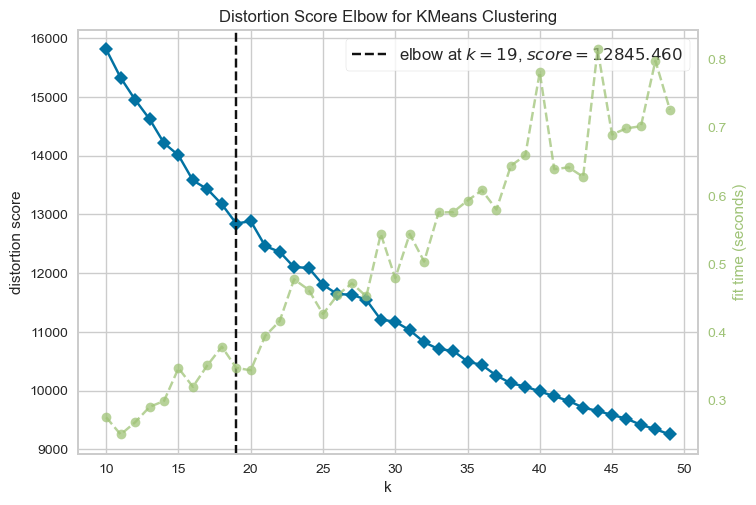

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [81]:
visualizer_normalized = KElbowVisualizer(kmeans_normalized, k=(10,50))

visualizer_normalized.fit(normalized_df) 
visualizer_normalized.poof()   

#### <font color='green'>KElbowVisualizer shows 19 as the best K</font>

#### Let's check the plot with a K=53 using _2D

In [82]:
kmeans_normalized = KMeans(n_clusters=19, random_state=42)
clusters_normalized = kmeans_normalized.fit_predict(normalized_df)
clusters_normalized

array([ 4, 10,  2, ...,  8, 17, 15], dtype=int32)

In [83]:
sscore_normalized= metrics.silhouette_score(normalized_df, clusters_normalized)
sscore_normalized

0.20000072799435462

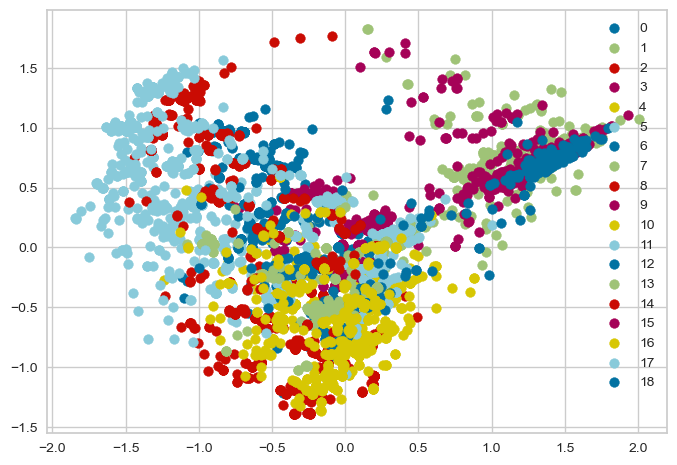

In [84]:
labels = np.unique(clusters_normalized)

for i in labels:
    plt.scatter(X_2D_normalized[clusters_normalized == i , 0] , X_2D_normalized[clusters_normalized == i , 1] , label = i)
plt.legend()
plt.show()



### <font color='purple'> Creating a new df with title, author, goodreads_book_id and cluster assigned</font>

In [85]:
books_enriched_cleaned_final.head()

average_rating  books_count  original_publication_year  pages  ratings_1  \
0            4.34          272                       2008    374      66715   
1            4.44          491                       1997    309      75504   
2            3.57          226                       2005    501     456191   
3            4.25          487                       1960    324      60427   
4            3.89         1356                       1925    200      86236   

   ratings_2  ratings_count  work_text_reviews_count  art_genre  \
0     127936        4780653                   155254          0   
1     101676        4602479                    75867          0   
2     436802        3866839                    95009          0   
3     117415        3198671                    72586          0   
4     197621        2683664                    51992          0   

   biography_genre  ...  romance_genre  science_genre  science-fiction_genre  \
0                0  ...              1              0                      1   
1                0  ...              0              0                      0   
2                0  ...              1              0                      0   
3                0  ...              0              0                      0   
4                0  ...              1              0                      0   

   self-help_genre  spirituality_genre  sports_genre  suspense_genre  \
0                0                   0             0               0   
1                0                   0             0               0   
2                0                   0             0               0   
3                0                   0             0               0   
4                0                   0             0               0   

   thriller_genre  travel_genre  young-adult_genre  
0               0             0                  1  
1               0             0                  1  
2               0             0                  1  
3               0             0                  1  
4               0             0                  0  

[5 rows x 47 columns]

In [86]:
books_enriched_cleaned_final.columns

Index(['average_rating', 'books_count', 'original_publication_year', 'pages',
       'ratings_1', 'ratings_2', 'ratings_count', 'work_text_reviews_count',
       'art_genre', 'biography_genre', 'books_genre', 'business_genre',
       'chick-lit_genre', 'christian_genre', 'classics_genre', 'comics_genre',
       'contemporary_genre', 'cookbooks_genre', 'crime_genre', 'fantasy_genre',
       'fiction_genre', 'gay-and-lesbian_genre', 'graphic-novels_genre',
       'historical-fiction_genre', 'history_genre', 'horror_genre',
       'humor-and-comedy_genre', 'manga_genre', 'memoir_genre', 'music_genre',
       'mystery_genre', 'nonfiction_genre', 'paranormal_genre',
       'philosophy_genre', 'poetry_genre', 'psychology_genre',
       'religion_genre', 'romance_genre', 'science_genre',
       'science-fiction_genre', 'self-help_genre', 'spirituality_genre',
       'sports_genre', 'suspense_genre', 'thriller_genre', 'travel_genre',
       'young-adult_genre'],
      dtype='object')

In [87]:
New_df = books_enriched_cleaned_final[['average_rating', 'original_publication_year']]
New_df.head()


average_rating  original_publication_year
0            4.34                       2008
1            4.44                       1997
2            3.57                       2005
3            4.25                       1960
4            3.89                       1925

In [88]:
New_df['small_image_url'] = books_enriched['small_image_url']
New_df['original_title'] = books_enriched_cleaned_final_copy['original_title']
New_df['authors'] = books_enriched_cleaned_final_copy['authors']
New_df['description'] = books_enriched_cleaned_copy['description']
New_df['genres'] = books_enriched_cleaned_copy['genres']
New_df['goodreads_book_id'] = books_enriched_cleaned_final_copy['goodreads_book_id']
New_df['isbn'] = books_enriched['isbn']
New_df['isbn13'] = books_enriched['isbn13']
New_df['cluster'] = clusters_normalized
New_df

average_rating  original_publication_year  \
0               4.34                       2008   
1               4.44                       1997   
2               3.57                       2005   
3               4.25                       1960   
4               3.89                       1925   
...              ...                        ...   
9943            3.98                       2005   
9944            4.18                       2016   
9945            3.69                       2000   
9946            4.12                       2010   
9947            4.00                       1998   

                                        small_image_url  \
0     https://images.gr-assets.com/books/1447303603s...   
1     https://images.gr-assets.com/books/1474154022s...   
2     https://images.gr-assets.com/books/1361039443s...   
3     https://images.gr-assets.com/books/1361975680s...   
4     https://images.gr-assets.com/books/1490528560s...   
...                                                 ...   
9943  https://images.gr-assets.com/books/1328407138s...   
9944  https://images.gr-assets.com/books/1435195536s...   
9945  https://s.gr-assets.com/assets/nophoto/book/50...   
9946  https://s.gr-assets.com/assets/nophoto/book/50...   
9947  https://images.gr-assets.com/books/1403194704s...   

                                original_title  \
0                             The Hunger Games   
1     Harry Potter and the Philosopher's Stone   
2                                     Twilight   
3                        To Kill a Mockingbird   
4                             The Great Gatsby   
...                                        ...   
9943                          The Twelfth Card   
9944                                 Feverborn   
9945    Tom Clancy's Net Force: Breaking Point   
9946                         Chasing The Night   
9947                       The First World War   

                                         authors  \
0                                Suzanne Collins   
1                    J.K. Rowling, Mary GrandPré   
2                                Stephenie Meyer   
3                                     Harper Lee   
4                            F. Scott Fitzgerald   
...                                          ...   
9943                            [Jeffery Deaver]   
9944                        [Karen Marie Moning]   
9945  [Steve Perry, Tom Clancy, Steve Pieczenik]   
9946                             [Iris Johansen]   
9947                               [John Keegan]   

                                            description  \
0     WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
1     Harry Potter's life is miserable. His parents ...   
2     About three things I was absolutely positive.\...   
3     The unforgettable novel of a childhood in a sl...   
4     Alternate Cover Edition ISBN: 0743273567 (ISBN...   
...                                                 ...   
9943  A high-school girl in Harlem, Geneva Settle, i...   
9944  In Karen Marie Moning’s latest installment of ...   
9945  In the year 2000, computers are the new superp...   
9946  A CIA agent's two-year-old child was stolen in...   
9947  The First World War created the modern world. ...   

                                                 genres  goodreads_book_id  \
0     [young-adult, fiction, fantasy, science-fictio...            2767052   
1             [fantasy, fiction, young-adult, classics]                  3   
2     [young-adult, fantasy, romance, fiction, paran...              41865   
3     [classics, fiction, historical-fiction, young-...               2657   
4      [classics, fiction, historical-fiction, romance]               4671   
...                                                 ...                ...   
9943  [mystery, thriller, fiction, crime, suspense, ...             106312   
9944  [fantasy, paranormal, romance, fiction, myster...           12444298   
9945  [fiction, thriller, books, mystery, suspe

In [89]:
New_df.shape

(9948, 11)

In [90]:
New_df.cluster.value_counts()

2     924
4     790
11    765
8     664
13    654
12    653
3     616
7     598
14    585
10    585
17    501
15    469
1     394
16    390
5     327
9     317
6     275
18    229
0     212
Name: cluster, dtype: int64

In [91]:
# Check out a series of books 'Twilight'

New_df[New_df['original_title'].str.contains('Twilight')]

average_rating  original_publication_year  \
2               3.57                       2005   
42              3.52                       2006   
587             4.30                       2011   
889             4.20                       2009   
922             3.88                       2005   
1301            4.03                       1984   
1423            3.82                       2003   
1510            4.31                       2005   
1889            3.78                       2007   
2841            3.74                       2010   
3724            4.23                       2011   
3846            4.26                       2005   
4183            4.05                       2002   
4253            4.39                       2009   
4631            3.86                       1984   
4671            4.26                       2011   
5597            4.21                       1985   
6155            4.18                       2009   
6663            4.38                       2010   
7030            4.30                       2006   
9053            3.81                       1984   

                                        small_image_url  \
2     https://images.gr-assets.com/books/1361039443s...   
42    https://images.gr-assets.com/books/1361039440s...   
587   https://images.gr-assets.com/books/1327904795s...   
889   https://s.gr-assets.com/assets/nophoto/book/50...   
922   https://images.gr-assets.com/books/1327930511s...   
1301  https://images.gr-assets.com/books/1390668127s...   
1423  https://images.gr-assets.com/books/1408325146s...   
1510  https://s.gr-assets.com/assets/nophoto/book/50...   
1889  https://s.gr-assets.com/assets/nophoto/book/50...   
2841  https://images.gr-assets.com/books/1317294278s...   
3724  https://images.gr-assets.com/books/1344265906s...   
3846  https://images.gr-assets.com/books/1327959055s...   
4183  https://images.gr-assets.com/books/1327877187s...   
4253  https://s.gr-assets.com/assets/nophoto/book/50...   
4631  https://s.gr-assets.com/assets/nophoto/book/50...   
4671  https://images.gr-assets.com/books/1327891963s...   
5597  https://s.gr-assets.com/assets/nophoto/book/50...   
6155  https://images.gr-assets.com/books/1380326419s...   
6663  https://s.gr-assets.com/assets/nophoto/book/50...   
7030  https://images.gr-assets.com/books/1363786463s...   
9053  https://images.gr-assets.com/books/1327999566s...   

                                         original_title  \
2                                              Twilight   
42                              New Moon (Twilight, #2)   
587   The Twilight Saga Breaking Dawn Part 1: The Of...   
889                        Twilight Director's Notebook   
922                                   The Twilight Saga   
1301                         Dragons of Autumn Twilight   
1423                             Crossroads of Twilight   
1510  The Twilight Saga Complete Collection  (Twilig...   
1889           The Twilight Collection (Twilight, #1-3)   
2841                        Twilight: The Graphic Novel   
3724              The Twilight Saga: The Official Guide   
3846                                           Twilight   
4183            A Caress of Twilight (Merry Gentry, #2)   
4253  Twilight and Philosophy: Vampires, Vegetarians...   
4631                                      Twilight Eyes   
4671                       Twilight: The Graphic Novel,   
5597  Dragonlance Chronicles: Dragons of Autumn Twil...   
6155                               Tempt Me at Twilight   
6663                               Twilight and History   
7030                                           Twilight   
9053                                           Twilight   

                                                authors  \
2                                       Stephenie Meyer   
42                                      Stephenie Meyer   
587                                      Mark Cotta Vaz   
889                                 Catherine Har

In [92]:
# Check out a series of books 'The Hunger Games'

New_df[New_df['original_title'].str.contains('The Hunger Games')]

average_rating  original_publication_year  \
0               4.34                       2008   
462             4.49                       2010   
664             4.51                       2012   
1260            4.40                       2012   

                                        small_image_url  \
0     https://images.gr-assets.com/books/1447303603s...   
462   https://images.gr-assets.com/books/1360094673s...   
664   https://images.gr-assets.com/books/1363678804s...   
1260  https://images.gr-assets.com/books/1322760235s...   

                                         original_title          authors  \
0                                      The Hunger Games  Suzanne Collins   
462                            The Hunger Games Box Set  Suzanne Collins   
664   The Hunger Games: Official Illustrated Movie C...        Kate Egan   
1260                     The Hunger Games Tribute Guide      Emily Seife   

                                            description  \
0     WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...   
462   The extraordinary, ground breaking New York Ti...   
664   Go behind the scenes of the making of The Hung...   
1260  The New York Times bestselling Hunger Games is...   

                                                 genres  goodreads_book_id  \
0     [young-adult, fiction, fantasy, science-fictio...            2767052   
462   [young-adult, fiction, fantasy, science-fictio...            7938275   
664                               [nonfiction, romance]           11742691   
1260  [young-adult, fantasy, fiction, science-fictio...           13027304   

           isbn        isbn13  cluster  
0     439023483  9.780439e+12        4  
462   545265355  9.780545e+12        4  
664   545422906  9.780545e+12       15  
1260  545457823  9.780545e+12        4

In [93]:
# Check out a series of books 'Harry Potter'

New_df[New_df['original_title'].str.contains('Harry Potter')]

average_rating  original_publication_year  \
1               4.44                       1997   
15              4.53                       1999   
17              4.46                       2003   
19              4.37                       1998   
20              4.53                       2000   
21              4.61                       2007   
23              4.54                       2005   
249             3.75                       2016   
383             4.74                       1998   
1870            4.48                       2010   
1957            4.66                       1999   
2822            4.61                       2003   
3028            4.77                       2003   
3440            4.73                       2005   
3740            4.55                       2010   
5390            4.56                       2003   
7419            4.10                       2010   
7499            4.40                       2001   
8411            4.56                       2011   
9046            3.96                       2001   
9404            4.09                       2008   
9713            4.45                       2004   

                                        small_image_url  \
1     https://images.gr-assets.com/books/1474154022s...   
15    https://images.gr-assets.com/books/1499277281s...   
17    https://images.gr-assets.com/books/1387141547s...   
19    https://images.gr-assets.com/books/1474169725s...   
20    https://images.gr-assets.com/books/1361482611s...   
21    https://images.gr-assets.com/books/1474171184s...   
23    https://images.gr-assets.com/books/1361039191s...   
249   https://images.gr-assets.com/books/1470082995s...   
383   https://images.gr-assets.com/books/1392579059s...   
1870  https://images.gr-assets.com/books/1464452934s...   
1957  https://s.gr-assets.com/assets/nophoto/book/50...   
2822  https://s.gr-assets.com/assets/nophoto/book/50...   
3028  https://s.gr-assets.com/assets/nophoto/book/50...   
3440  https://images.gr-assets.com/books/1328867351s...   
3740  https://images.gr-assets.com/books/1328739344s...   
5390  https://s.gr-assets.com/assets/nophoto/book/50...   
7419  https://s.gr-assets.com/assets/nophoto/book/50...   
7499  https://images.gr-assets.com/books/1479775271s...   
8411  https://images.gr-assets.com/books/1317345385s...   
9046  https://s.gr-assets.com/assets/nophoto/book/50...   
9404  https://s.gr-assets.com/assets/nophoto/book/50...   
9713  https://s.gr-assets.com/assets/nophoto/book/50...   

                                         original_title  \
1              Harry Potter and the Philosopher's Stone   
15             Harry Potter and the Prisoner of Azkaban   
17            Harry Potter and the Order of the Phoenix   
19              Harry Potter and the Chamber of Secrets   
20                  Harry Potter and the Goblet of Fire   
21                 Harry Potter and the Deathly Hallows   
23               Harry Potter and the Half-Blood Prince   
249   Harry Potter and the Cursed Child, Parts One a...   
383                     Complete Harry Potter Boxed Set   
1870                        Harry Potter: Film Wizardry   
1957                   Harry Potter Boxed Set Books 1-4   
2822  Harry Potter and the Chamber of Secrets: Sheet...   
3028  Harry Potter Boxed Set, Books 1-5 (Harry Potte...   
3440       Harry Potter Collection (Harry Potter, #1-6)   
3740  Harry Potter: A Pop-Up Book: Based on the Film...   
5390  Harry Potter and the Order of the Phoenix (Har...   
7419  The Unofficial Harry Potter Cookbook: From Cau...   
7499  Harry Potter Schoolbooks Box Set: Two Classic ...   
8411  Harry Potter Page to Screen: The Complete Film...   
9046  The Magical Worlds of Harry Potter: A Treasury...   
9404  Harry, A History: The True Story of a Boy Wiza...   
9713  Harry Potter and Philosophy: If Aristotle Ran ...   

                                      authors  \
1                 J.K. Rowling, Mary GrandPré   
15    J.K. Rowling

## <font color='purple'> DBScan Uisng Standardized data</font>

#### k-distance graphs

For each point, compute the distance to its kth nearest neighbor, where k could be for example 2% of the total data. These distances are then plotted in ascending order. The "elbow" in this plot, if there is one, can be a good choice for eps. If there is no clear elbow point, it may mean that DBSCAN is not a good method for the data.

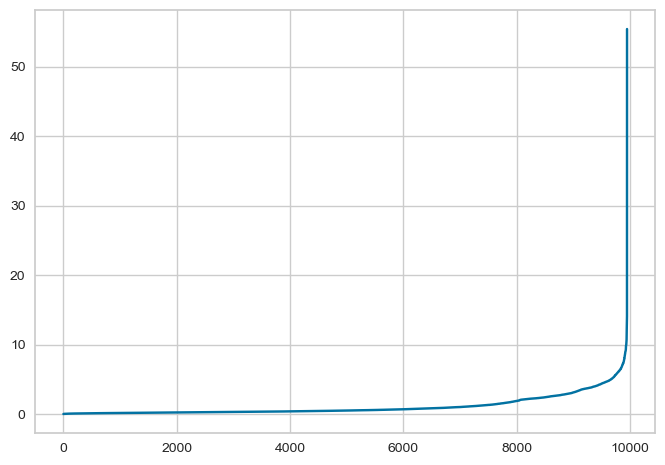

In [94]:
# We'll use 2% of the total points 
k_dbs_s = int(len(standardized_df) * 0.02)


NN = NearestNeighbors(n_neighbors=k_dbs_s)
NN.fit(standardized_df)

# get the k-neighbors distance
distances, _ = NN.kneighbors(standardized_df)

# sort the distance and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()


I will choose eps 6 based on this plot and for min samles I will choose 48 based on the rule of thumb which suggests starting  with the dimensionality of the dataset plus one  and see if that gives you reasonable results. 

In [95]:
# initialize DBSCAN object with eps and min_samples

dbscan = DBSCAN(eps=6, min_samples=48).fit(standardized_df)
dbs_clusters_standard = dbscan.labels_

In [96]:
print(dbs_clusters_standard)

[-1 -1 -1 ...  0  0  0]


### Let's create a plot of these clusters using t-SNE for dimensionality reduction

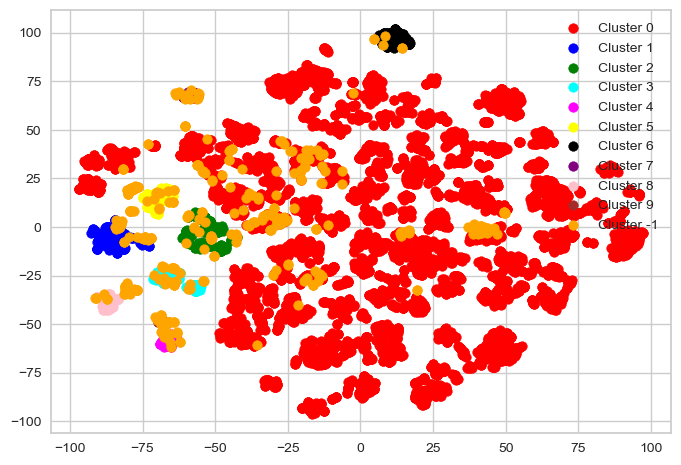

In [97]:
# Reduce your high dimensional data to 2 dimensions using t-SNE

tsne_standard = TSNE(n_components=2, random_state=0)
X_2d_dbs_standard = tsne_standard.fit_transform(standardized_df)

# Perform DBSCAN on the original data
dbscan = DBSCAN(eps=6, min_samples=20)
labels_dbs_s = dbscan.fit_predict(standardized_df)

# Now let's create a scatter plot for each cluster
# Create a colormap for the labels
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'lightblue', 'lime', 'lavender', 'turquoise', 'darkgreen', 'tan', 'salmon', 'gold', 'darkred', 'darkblue']

for i, label in enumerate(set(labels_dbs_s)):
    cluster_dbs_s = X_2d_dbs_standard[labels_dbs_s == label]
    plt.scatter(cluster_dbs_s[:, 0], cluster_dbs_s[:, 1], c=colors[i%len(colors)], label=f'Cluster {label}')

plt.legend()
plt.show()


### Let's create a plot of these clusters using PCA for dimensionality reduction

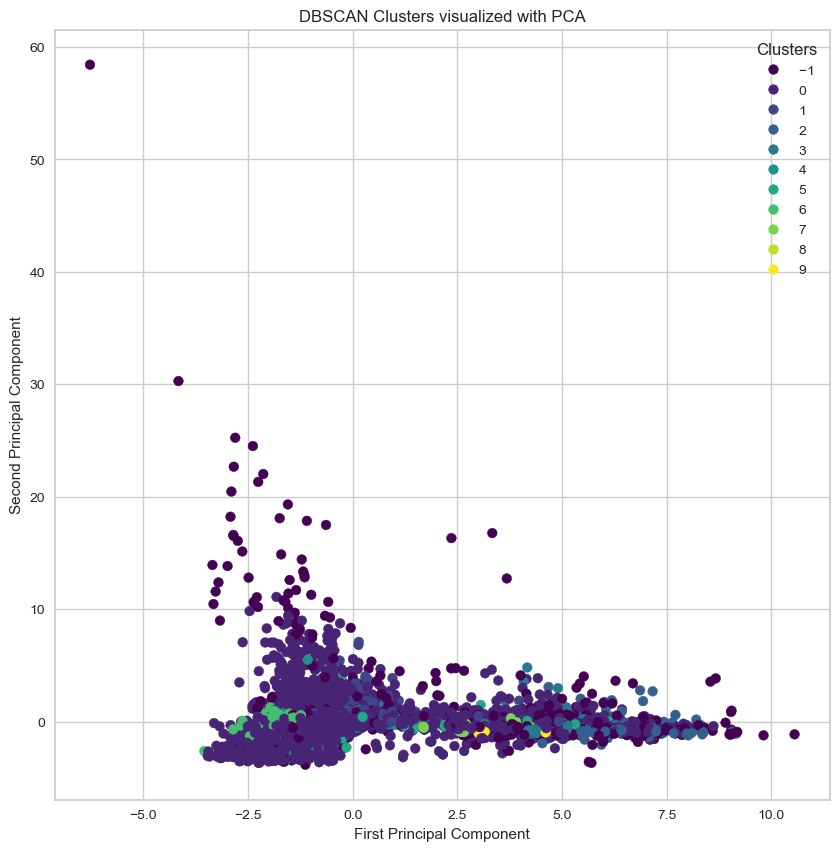

In [98]:

pca = PCA(n_components=2) 
dbs_pca_standard = pca.fit_transform(standardized_df)


labels_dbs_s = dbscan.labels_

# create a scatter plot of the two principal components 
plt.figure(figsize=(10, 10))
scatter = plt.scatter(dbs_pca_standard[:,0], dbs_pca_standard[:,1], c=labels_dbs_s, cmap='viridis')

# produce a legend with unique colors from the scatter
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('DBSCAN Clusters visualized with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

I have a big chunk of my data with cluster zero it might be because my eps value is large (that most points fall within the eps distance of each other, leading to them being clustered together) or min_samples too small which I don't think is the case. **I will decrease my eps to 5**



In [99]:
dbscan = DBSCAN(eps=4, min_samples=48).fit(standardized_df)
dbs_clusters_standard = dbscan.labels_

print(dbs_clusters_standard)

[-1 -1 -1 ...  0  0  0]


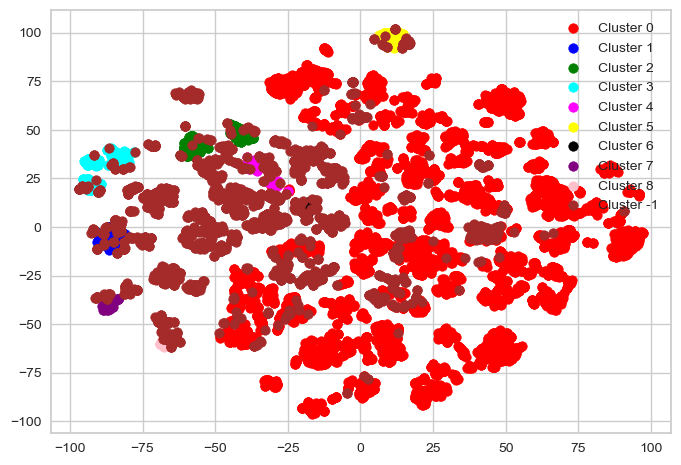

In [100]:
#ploting with TSNE again to see if reducing eps had any significant effect

tsne_standard = TSNE(n_components=2, random_state=0)
X_2d_dbs_standard = tsne_standard.fit_transform(standardized_df)

# Perform DBSCAN on the original data
dbscan = DBSCAN(eps=4, min_samples=48)
labels_dbs_s = dbscan.fit_predict(standardized_df)

# Now let's create a scatter plot for each cluster
# Create a colormap for the labels
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'lightblue', 'lime', 'lavender', 'turquoise', 'darkgreen', 'tan', 'salmon', 'gold', 'darkred', 'darkblue']

for i, label in enumerate(set(labels_dbs_s)):
    cluster_dbs_s = X_2d_dbs_standard[labels_dbs_s == label]
    plt.scatter(cluster_dbs_s[:, 0], cluster_dbs_s[:, 1], c=colors[i%len(colors)], label=f'Cluster {label}')

plt.legend()
plt.show()

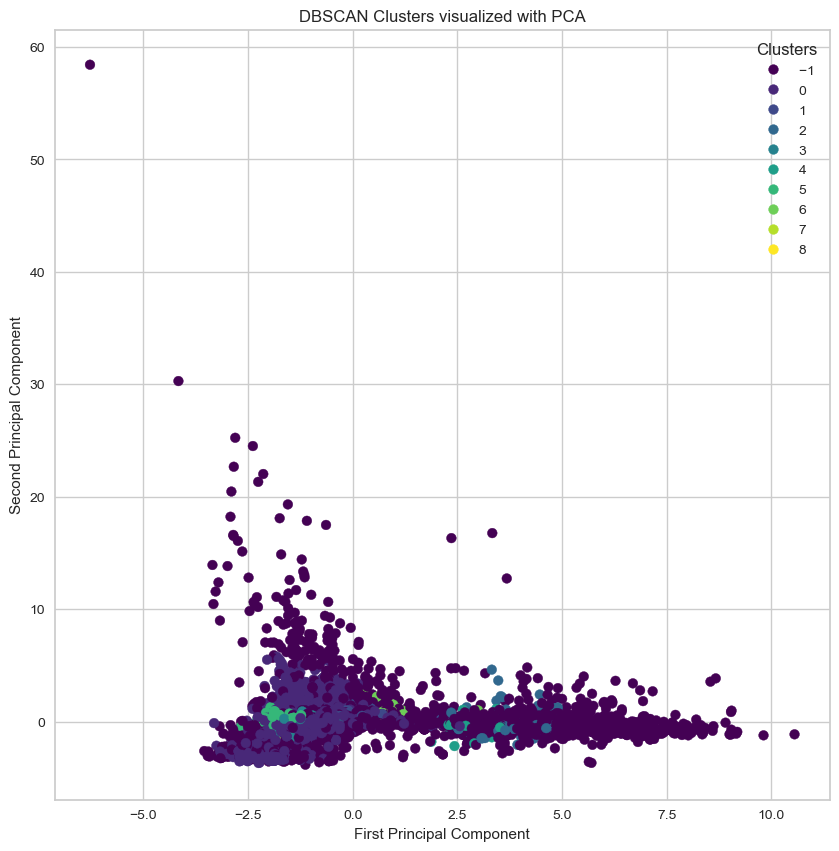

In [101]:
#ploting with PCA again to see if reducing eps had any significant effect

pca = PCA(n_components=2) 
dbs_pca_standard = pca.fit_transform(standardized_df)


labels_dbs_s = dbscan.labels_

# create a scatter plot of the two principal components 
plt.figure(figsize=(10, 10))
scatter = plt.scatter(dbs_pca_standard[:,0], dbs_pca_standard[:,1], c=labels_dbs_s, cmap='viridis')

# produce a legend with unique colors from the scatter
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('DBSCAN Clusters visualized with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

#### The result is not eye catching!

## <font color='purple'> DBScan Uisng Normalized data</font>

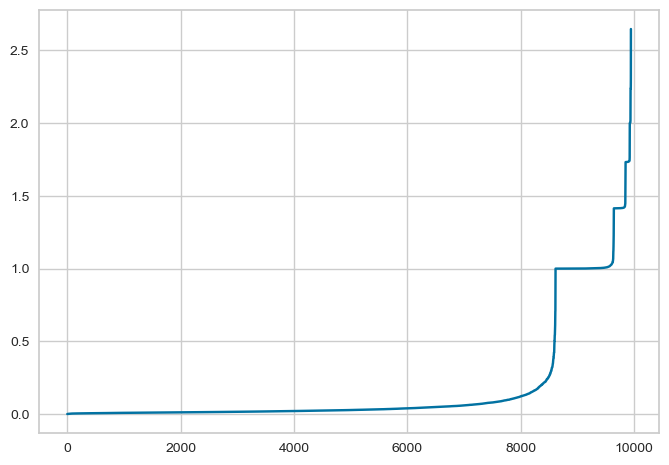

In [102]:
#Let's check the value for eps using normalized data

# We'll use 2% of the total points 
k_dbs_n = int(len(normalized_df) * 0.02)


nn = NearestNeighbors(n_neighbors=k_dbs_n)
nn.fit(normalized_df)

# get the k-neighbors distance
distances, _ = nn.kneighbors(normalized_df)

# sort the distance and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show()

I will choose  0.25 for my epsilon value based on the above plot.

In [103]:
# initialize DBSCAN object with eps and min_samples

dbscan = DBSCAN(eps=0.25, min_samples=58).fit(normalized_df)
dbs_clusters_normalized = dbscan.labels_
print(dbs_clusters_normalized)

[-1 -1 -1 ... -1 -1 -1]


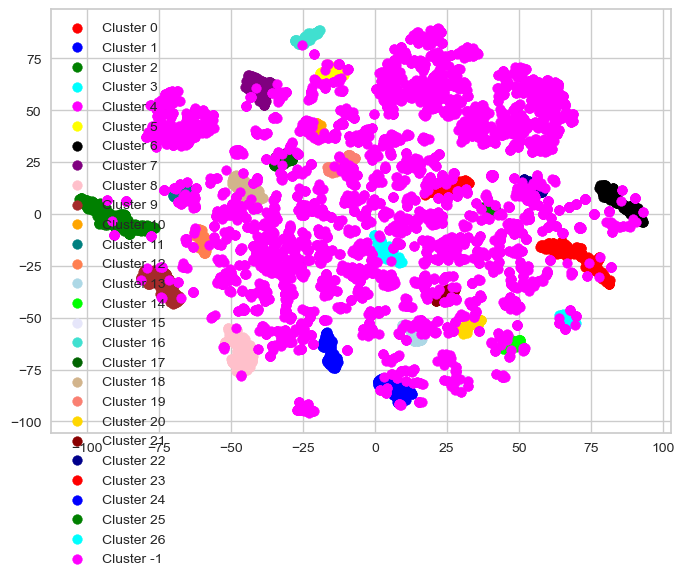

In [104]:
#ploting with TSNE again to see if reducing eps had any significant effect

tsne_normalized = TSNE(n_components=2, random_state=0)
X_2d_dbs_normalized = tsne_normalized.fit_transform(normalized_df)

# Perform DBSCAN on the original data
dbscan = DBSCAN(eps=0.25, min_samples=58)
labels_dbs_n = dbscan.fit_predict(normalized_df)


# Create a colormap for the labels
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'pink', 'brown', 'orange', 'teal', 'coral', 'lightblue', 'lime', 'lavender', 'turquoise', 'darkgreen', 'tan', 'salmon', 'gold', 'darkred', 'darkblue']

for i, label in enumerate(set(labels_dbs_n)):
    cluster_dbs_n = X_2d_dbs_normalized[labels_dbs_n == label]
    plt.scatter(cluster_dbs_n[:, 0], cluster_dbs_n[:, 1], c=colors[i%len(colors)], label=f'Cluster {label}')

plt.legend()
plt.show()

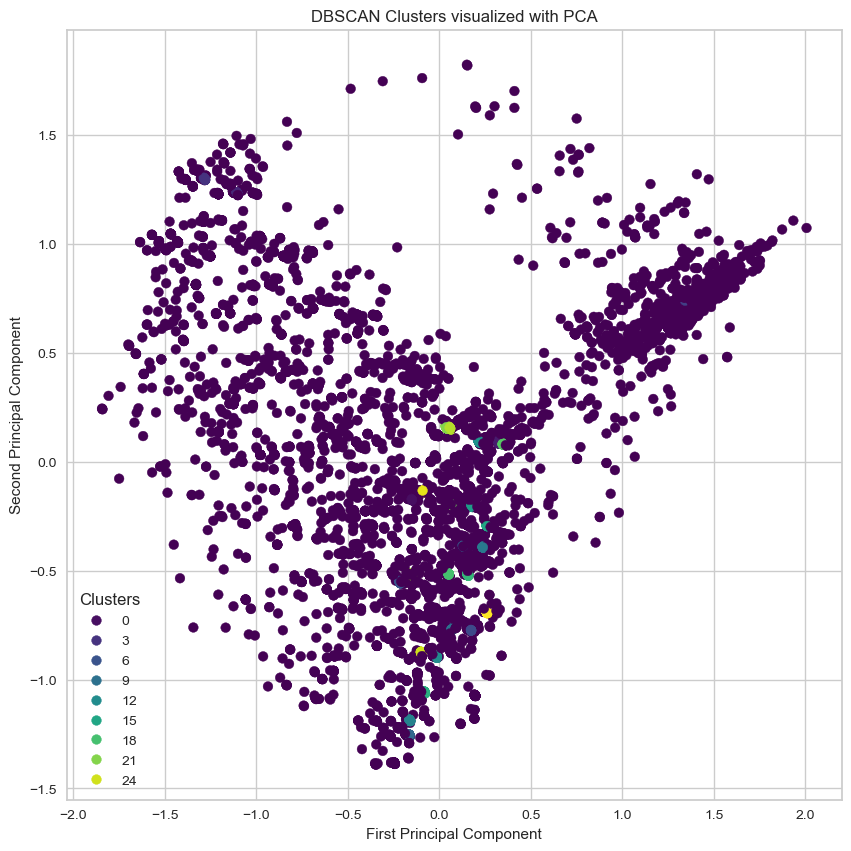

In [105]:
pca = PCA(n_components=2) 
dbs_pca_normalized = pca.fit_transform(normalized_df)


labels_dbs_n = dbscan.labels_

# create a scatter plot of the two principal components 
plt.figure(figsize=(10, 10))
scatter = plt.scatter(dbs_pca_normalized[:,0], dbs_pca_normalized[:,1], c=labels_dbs_n, cmap='viridis')

# produce a legend with unique colors from the scatter
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.title('DBSCAN Clusters visualized with PCA')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

#### Doesn't matter how much I change the eps and min_samples, the result keeps being aweful!

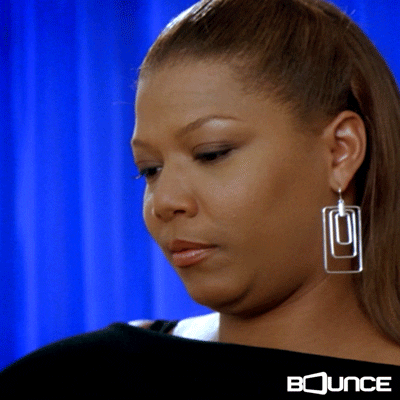

## <font color='Burgandi'> Book Recommender</font>



### <font color='burgandi'>Logic</font>
    
<font color='burgandi'> **1. Ask for an input from the user** </font>
    
<font color='burgandi'>**2. Check if that book is in the dataset**</font>
    
<font color='burgandi'>**2.1 user_song is in the dataset: get the cluster number and randomly choose a book from the same cluster and print it**</font>

<font color='burgandi'>**2.2. user_song is not in the dataset: ask for a favourite genre  and favourite author and then either randomly choose a book in the same genre with average rating above 4 or of it was not in the dataset randomly choose a book from the same author with average rating above 4 and recommend that.**</font>

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

def book_recommender(df):
    
    user_book = input("Choose a book you like to get a recommendation: ")

    matching_books = New_df[New_df['original_title'].str.contains(user_book, case=False)]
    
    if not matching_books.empty:
        user_book_cluster = matching_books['cluster'].values[0]
        same_cluster_books = New_df[New_df['cluster'] == user_book_cluster]
        recommendation = random.choice(same_cluster_books['original_title'].tolist())
        print("You might also like: ", recommendation)
        
    else:
        print("The book you chose is not in the database./No books found with that title.")
        genre = input("Enter your favourite genre: ")
        author = input("Enter your favourite author: ")

        # Create a list of unique genres
        unique_genres = df['genres'].explode().unique()

        # Find the best match for the user's genre
        best_match, score = process.extractOne(genre, unique_genres)

        if score >= 80:
            same_genre_books = New_df[New_df['genres'].apply(lambda genres: best_match in genres) & (New_df['average_rating'] > 4.00)]
            if len(same_genre_books) > 0:
                recommendation = random.choice(same_genre_books['original_title'].tolist())
                print("You might also like: ", recommendation)
        else:
            # Find a book by the author
            same_author_books = New_df[New_df['author'].apply(lambda x: fuzz.ratio(x, author) >= 80) & (New_df['average_rating'] > 4.00)]
            if len(same_author_books) > 0:
                recommendation = random.choice(same_author_books['original_title'].tolist())
                print("You might also like: ", recommendation)
            else:
                print("No high-rated books found for your favorite genre or author.")
    
book_recommender(New_df)

In [ ]:
# testing a recommended book 'Post Office'

New_df[New_df['original_title'].str.contains('Forward the Foundation')]

In [ ]:
final_df= pd.read_csv( 'final_df.csv' )
final_df.head()

In [ ]:
# Convert the string representation of list to actual list
final_df['genres'] = final_df['genres'].apply(ast.literal_eval)

# Join the list elements into a string with comma separation
final_df['genres'] = final_df['genres'].apply(lambda x: ', '.join(x))

In [ ]:
New_df.head()

#exporting the final df so I can use it in streamlit
New_df.to_csv('final_final_df.csv', index=False)

In [ ]:
New_df["cluster"].nunique()

In [ ]:
#exporting the final df so I can use it in streamlit
New_df.to_csv('nineteen_cluster_df.csv', index=False)